In [770]:
#Importar librerias a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [771]:
#Importar base de datos 
df=pd.read_csv('base de datos vph.csv', infer_datetime_format=True)

In [772]:
#Análsis exploratorio de base de datos
df.head()

,# paciente,Expediente,Diagnóstico de egreso,CIE-10,Fecha de ingreso,Fecha de egreso,Peso (kg),Talla (m),IMC (kg/m2),Edad,...,Queratinización,Invasión a cartílago,Invasión linfovascular,Invasión perineural,Margen quirúrgico positivo,Margen quirúrgico negativo,# Ganglios con metástasis,Extensión extracapsular,VPH,Genotipo VPH
0,2.0,1003294.0,Cáncer de laringe,C32,07/02/2008,29/06/2009,59.1,1.64,21.973528,70.0,...,No queratinizante,No,Sí,No,NaN,NaN,No,No,Negativo,NaN
1,1.0,1007916.0,Cáncer de laringe,C32,24/07/2018,17/10/2008,65.3,1.62,24.881878,60.0,...,Queratinizante,NaN,NaN,NaN,NaN,NaN,3,Sí,Negativo,NaN
2,6.0,1016864.0,Cáncer de laringe,C32,30/03/2009,19/04/2011,68.0,1.66,24.677021,53.0,...,Queratinizante,NaN,NaN,NaN,NaN,NaN,3,No,Negativo,NaN
3,37.0,1020069.0,Cáncer de laringe,C32,14/02/2014,16/04/2015,81.0,NaN,NaN,75.0,...,No queratinizante,Sí,Sí,Sí,NaN,NaN,NaN,NaN,Negativo,NaN
4,5.0,1022783.0,Cáncer de laringe,C32,08/10/2009,09/02/2010,NaN,NaN,NaN,64.0,...,No queratinizante,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negativo,NaN


In [773]:
#Estadística general
peso_medio= df['Peso (kg)'].dropna().mean()
talla_media= df['Talla (m)'].dropna().mean()
imc_medio= df['IMC (kg/m2)'].dropna().mean()
edad_media= df['Edad'].dropna().mean()
edad_sd= np.std(df['Edad'], ddof=1)
dx_histologico= df['Tipo histológico'].value_counts()


In [774]:
print(['Peso medio:', peso_medio, 'Talla media:', talla_media, 'IMC medio:', imc_medio, 'Edad media:', edad_media, 'Edad DE:', edad_sd])

['Peso medio:', 71.28666666666666, 'Talla media:', 1.6489999999999996, 'IMC medio:', 26.05149317761905, 'Edad media:', 62.791666666666664, 'Edad DE:', 11.264627999700265]


In [775]:
print(df[df['VPH']=='Positivo']['Edad'].mean())
print(df[df['VPH']=='Negativo']['Edad'].mean())

58.5
63.404761904761905


In [776]:
print(df[df['VPH']=='Positivo']['Tiempo de exposición al alcohol (años)'].mean())
print(df[df['VPH']=='Negativo']['Tiempo de exposición al alcohol (años)'].mean())

29.5
38.69230769230769


In [777]:
print(df[df['VPH']=='Positivo']['Tiempo de exposición al tabaco (años)'].mean())
print(df[df['VPH']=='Negativo']['Tiempo de exposición al tabaco (años)'].mean())

42.666666666666664
39.15384615384615


In [778]:
print(df[df['VPH']=='Positivo']['Índice tabáquico'].mean())
print(df[df['VPH']=='Negativo']['Índice tabáquico'].mean())

12.299999999999999
44.26304347826087


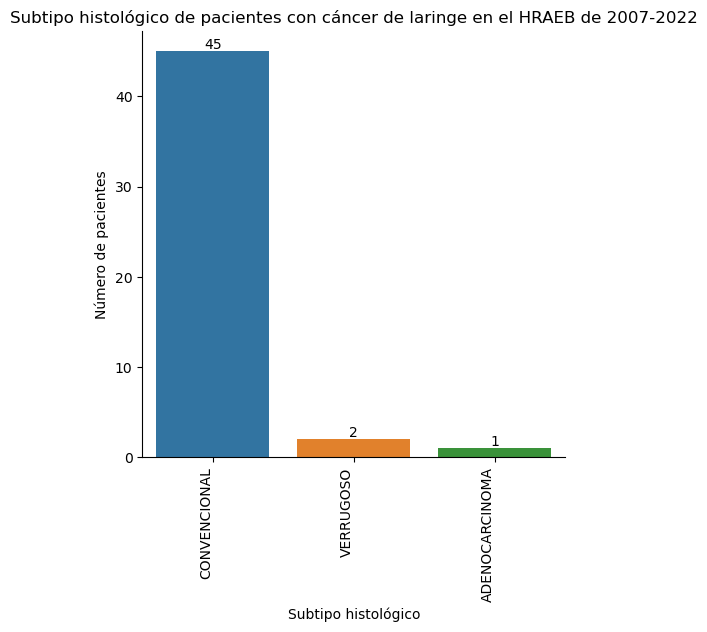

In [779]:
s = sns.catplot(x='Subtipo histológico', kind='count', data=df)
for ax in s.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Subtipo histológico de pacientes con cáncer de laringe en el HRAEB de 2007-2022')
    plt.xticks(rotation=90, ha='right')
plt.show()

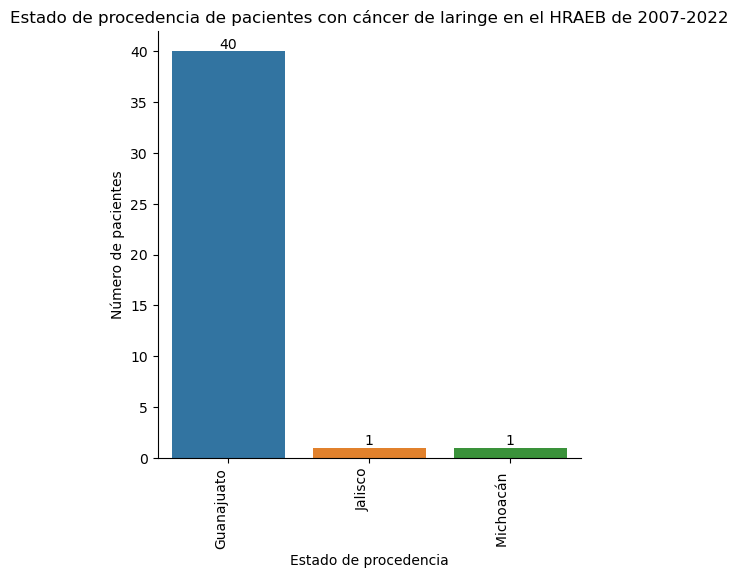

In [780]:
f= sns.catplot(x='Estado de procedencia', kind='count', data=df)
for ax in f.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Estado de procedencia de pacientes con cáncer de laringe en el HRAEB de 2007-2022')
    plt.xticks(rotation=90, ha='right')
plt.show()

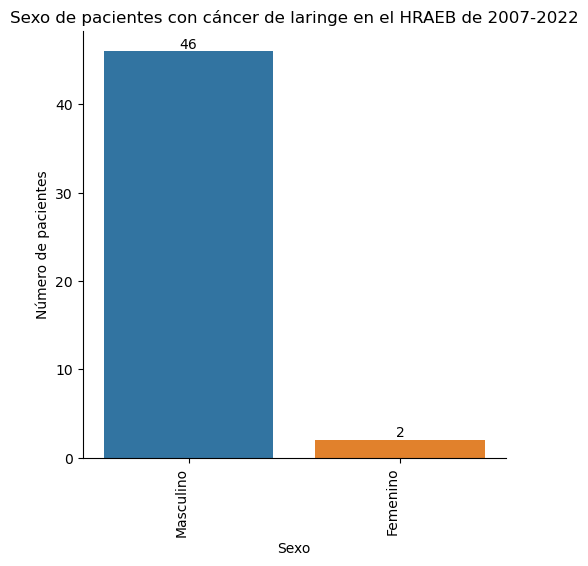

In [781]:
d= sns.catplot(x='Sexo', kind='count', data=df)
for ax in d.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Sexo de pacientes con cáncer de laringe en el HRAEB de 2007-2022')
    plt.xticks(rotation=90, ha='right')
plt.show()

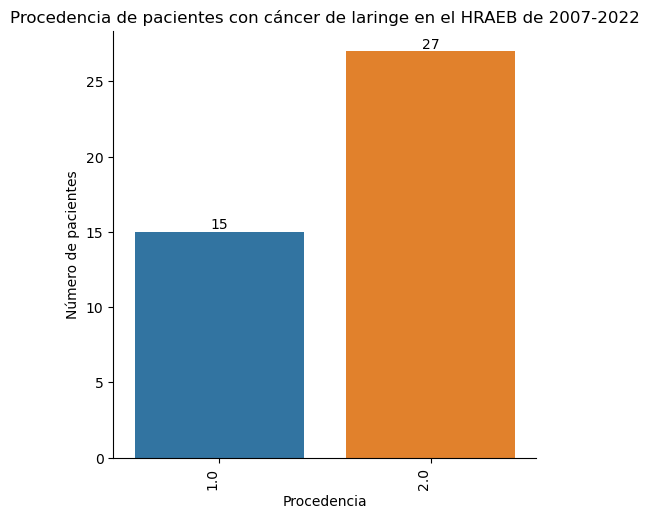

In [782]:
a= sns.catplot(x='Procedencia', kind='count', data=df)
for ax in a.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Procedencia de pacientes con cáncer de laringe en el HRAEB de 2007-2022')
    plt.xticks(rotation=90, ha='right')
plt.show()

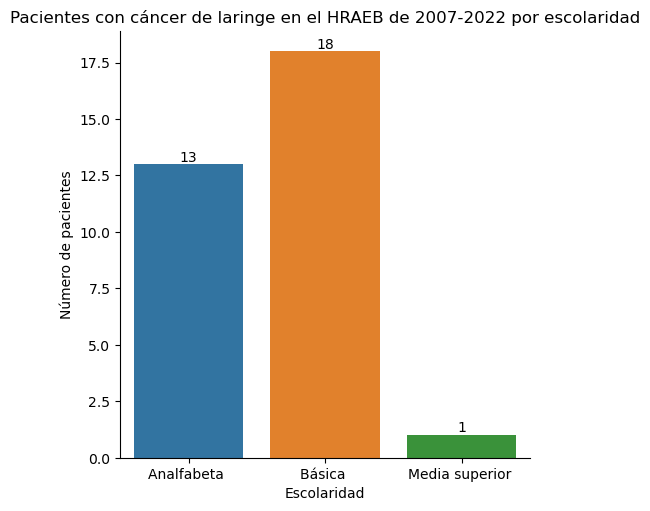

In [783]:
e= sns.catplot(x= 'Escolaridad', kind='count', data=df)
for ax in e.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Pacientes con cáncer de laringe en el HRAEB de 2007-2022 por escolaridad')
    plt.show(e)

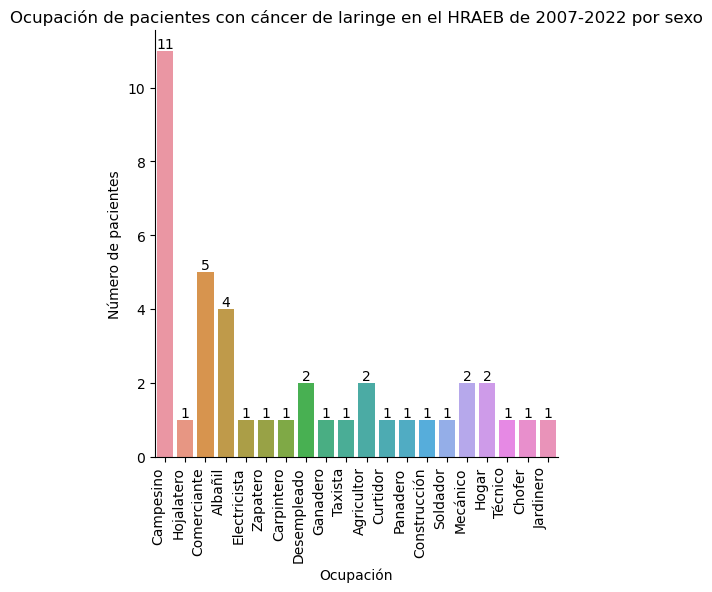

In [784]:
do = sns.catplot(x= 'Ocupación', kind='count', data=df)
for ax in do.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Ocupación de pacientes con cáncer de laringe en el HRAEB de 2007-2022 por sexo')
    plt.xticks(rotation=90, ha='right')
    plt.show(do)

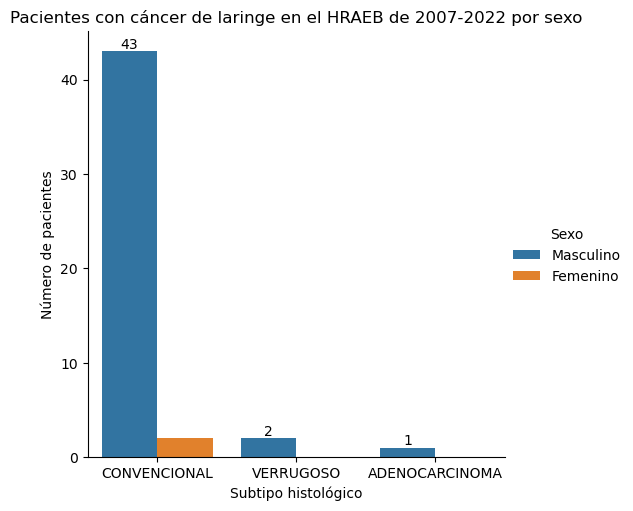

In [785]:
d = sns.catplot(x= 'Subtipo histológico', kind='count', data=df, hue='Sexo')
for ax in d.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Pacientes con cáncer de laringe en el HRAEB de 2007-2022 por sexo')
    plt.show(d)

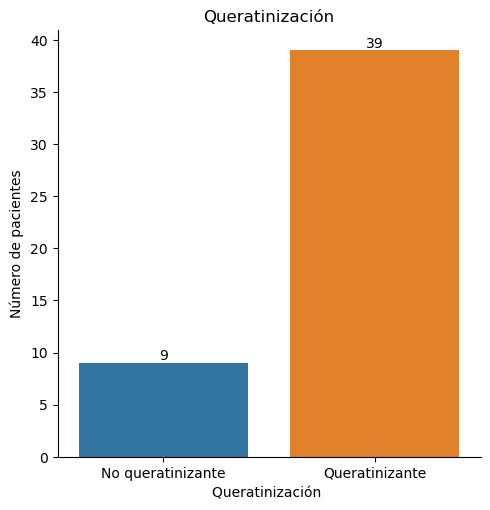

In [786]:
z = sns.catplot(x= 'Queratinización ', kind='count', data=df)
for ax in z.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Queratinización')
    plt.show(z)

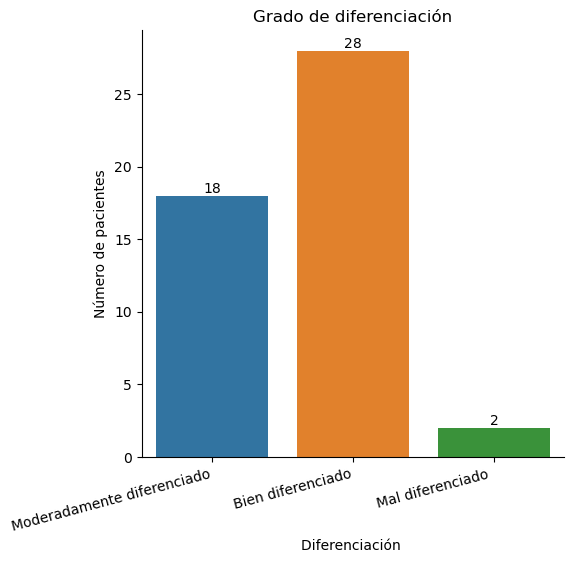

In [787]:
o = sns.catplot(x= 'Diferenciación ', kind='count', data=df)
for ax in o.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Grado de diferenciación')
    plt.xticks(rotation=15, ha='right')
    plt.show(o)

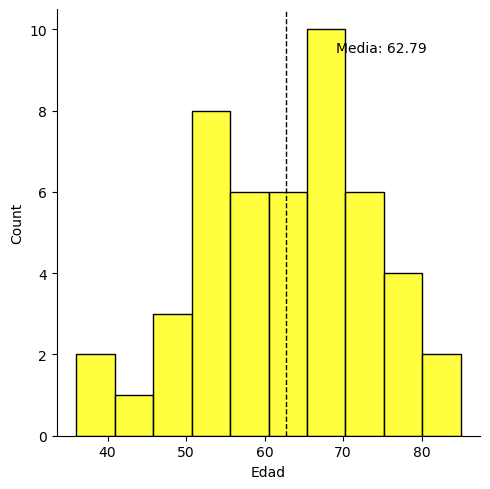

In [788]:
sns.displot(data=df, x='Edad', kind='hist', bins=10, color='Yellow')
plt.axvline(df['Edad'].mean(), color='k', linestyle='dashed', linewidth=1)
ax.set(ylabel='Número de pacientes', title= 'Ditribución por edad de pacientes con diagnóstico de cáncer de laringe')
min_ylim, max_ylim = plt.ylim()
plt.text(df['Edad'].mean()*1.1, max_ylim*0.9, 'Media: {:.2f}'.format(df['Edad'].mean()))
plt.show()

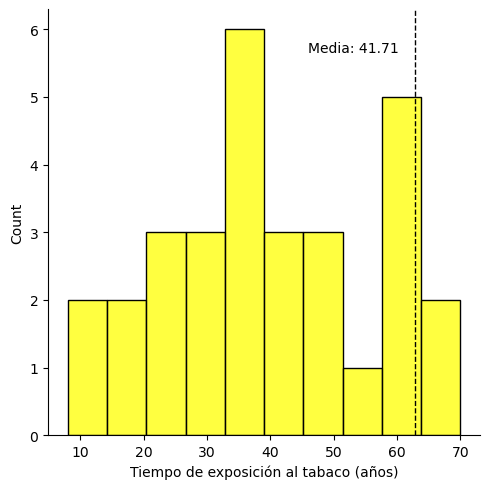

In [789]:
sns.displot(data=df, x='Tiempo de exposición al tabaco (años)', kind='hist', bins=10, color='Yellow')
plt.axvline(df['Edad'].mean(), color='k', linestyle='dashed', linewidth=1)
ax.set(ylabel='Número de pacientes')
min_ylim, max_ylim = plt.ylim()
plt.text(df['Índice tabáquico'].mean()*1.1, max_ylim*0.9, 'Media: {:.2f}'.format(df['Índice tabáquico'].mean()))
plt.show()

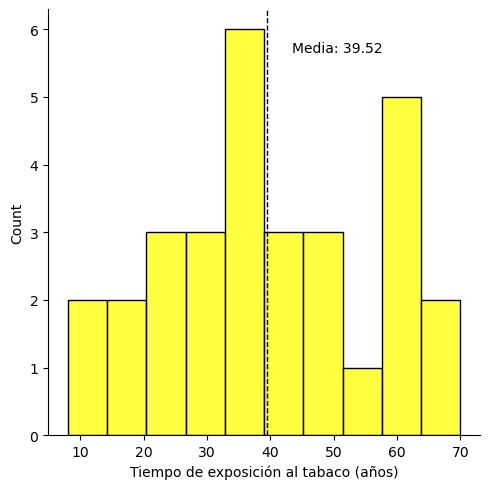

In [790]:
sns.displot(data=df, x='Tiempo de exposición al tabaco (años)', kind='hist', bins=10, color='Yellow')
plt.axvline(df['Tiempo de exposición al tabaco (años)'].mean(), color='k', linestyle='dashed', linewidth=1)
ax.set(ylabel='Número de pacientes')
min_ylim, max_ylim = plt.ylim()
plt.text(df['Tiempo de exposición al tabaco (años)'].mean()*1.1, max_ylim*0.9, 'Media: {:.2f}'.format(df['Tiempo de exposición al tabaco (años)'].mean()))
plt.show()

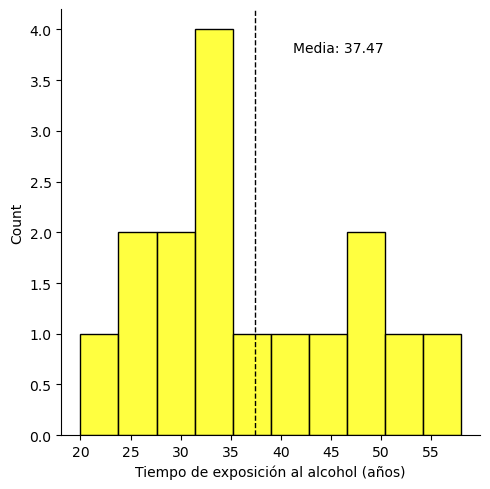

In [791]:
sns.displot(data=df, x='Tiempo de exposición al alcohol (años)', kind='hist', bins=10, color='Yellow')
plt.axvline(df['Tiempo de exposición al alcohol (años)'].mean(), color='k', linestyle='dashed', linewidth=1)
ax.set(ylabel='Número de pacientes')
min_ylim, max_ylim = plt.ylim()
plt.text(df['Tiempo de exposición al alcohol (años)'].mean()*1.1, max_ylim*0.9, 'Media: {:.2f}'.format(df['Tiempo de exposición al alcohol (años)'].mean()))
plt.show()

In [792]:
treinta_cincuenta= df['Edad']<=50
cincuenta= df['Edad']>50
setenta= df['Edad']<=70
cincuenta_setenta= df[cincuenta&setenta]
setenta_ymas= df['Edad']>=71
print(treinta_cincuenta.value_counts())

False    44
True      6
Name: Edad, dtype: int64


In [793]:
print(setenta_ymas.value_counts())
print(treinta_cincuenta.value_counts(normalize=True))
print(setenta_ymas.value_counts(normalize=True))

False    38
True     12
Name: Edad, dtype: int64
False    0.88
True     0.12
Name: Edad, dtype: float64
False    0.76
True     0.24
Name: Edad, dtype: float64


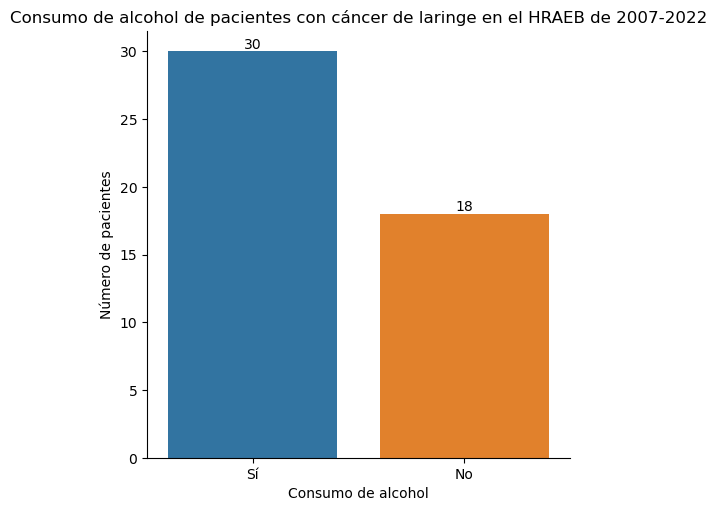

In [794]:
a = sns.catplot(x='Consumo de alcohol', kind='count', data=df)
for ax in a.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Consumo de alcohol de pacientes con cáncer de laringe en el HRAEB de 2007-2022')
    plt.show(a)

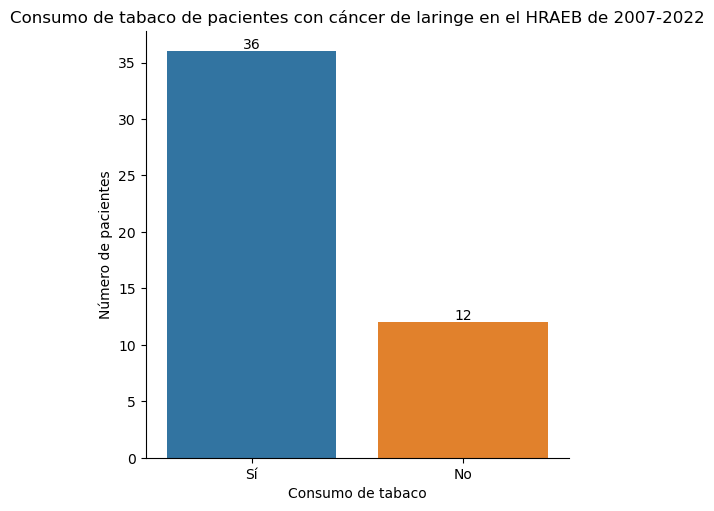

In [795]:
b = sns.catplot(x='Consumo de tabaco', kind='count', data=df)
for ax in b.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Consumo de tabaco de pacientes con cáncer de laringe en el HRAEB de 2007-2022')
    plt.show(b)

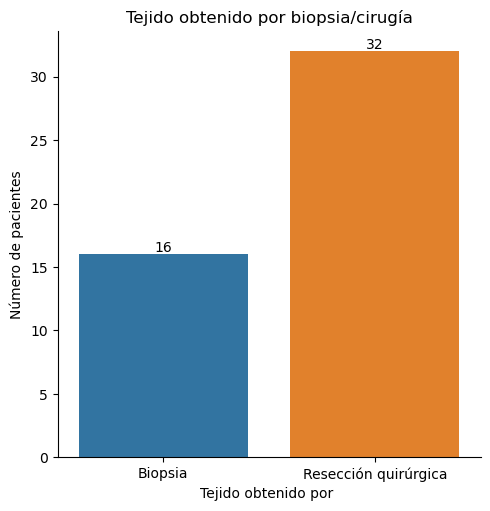

In [796]:
c = sns.catplot(x= 'Tejido obtenido por ', kind='count', data=df)
for ax in c.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Tejido obtenido por biopsia/cirugía')
    plt.show(c)
    

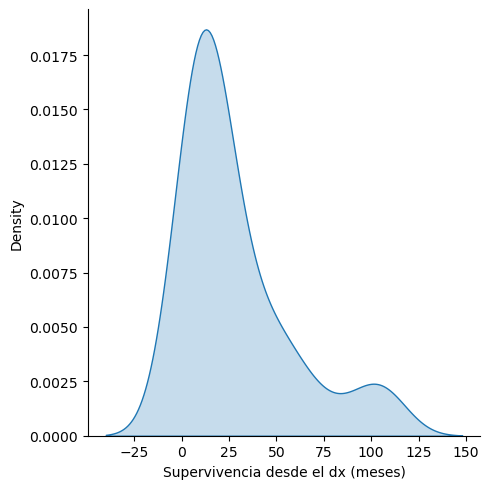

In [797]:
supervivencia= df['Supervivencia desde el dx (meses)'].dropna()
sns.displot(x= supervivencia, kind='kde', data=df, fill=True)
plt.show()

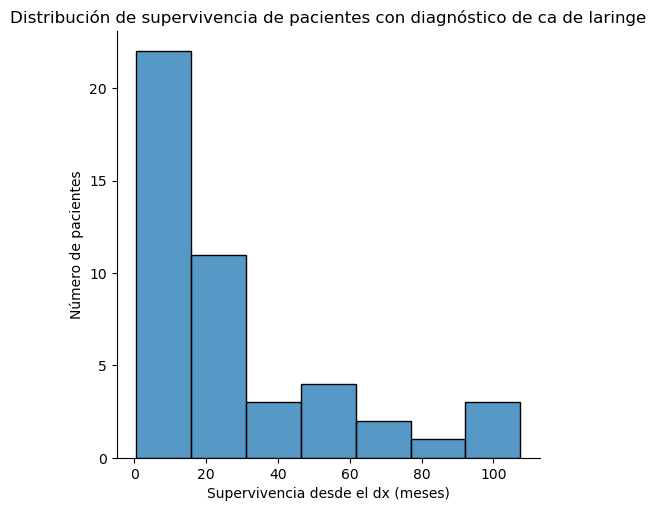

In [798]:
sns.displot(x= supervivencia, kind='hist', data=df)
plt.title('Distribución de supervivencia de pacientes con diagnóstico de ca de laringe')
plt.ylabel('Número de pacientes')
plt.show()

In [799]:
supervivencia_average= df['Supervivencia desde el dx (meses)'].mean()
print ('Tiempo de vigilancia media:',supervivencia_average)

Tiempo de vigilancia media: 28.033333333826082


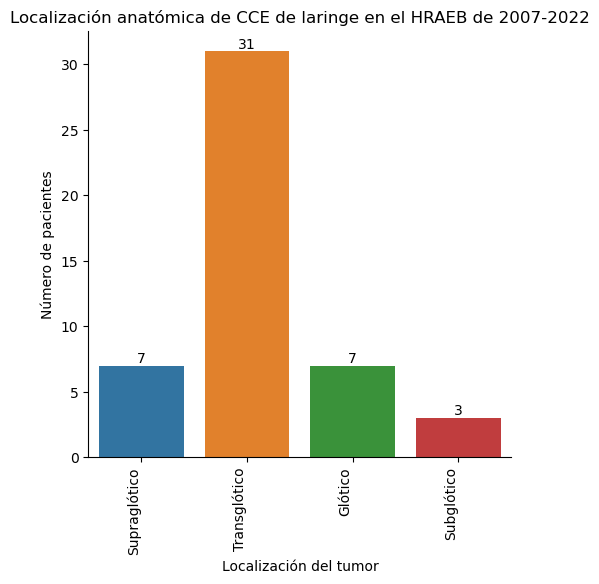

In [800]:
v = sns.catplot(x= 'Localización del tumor', kind='count', data=df)
for ax in v.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Localización anatómica de CCE de laringe en el HRAEB de 2007-2022')
    plt.xticks(rotation=90, ha='right')
    plt.show(v)

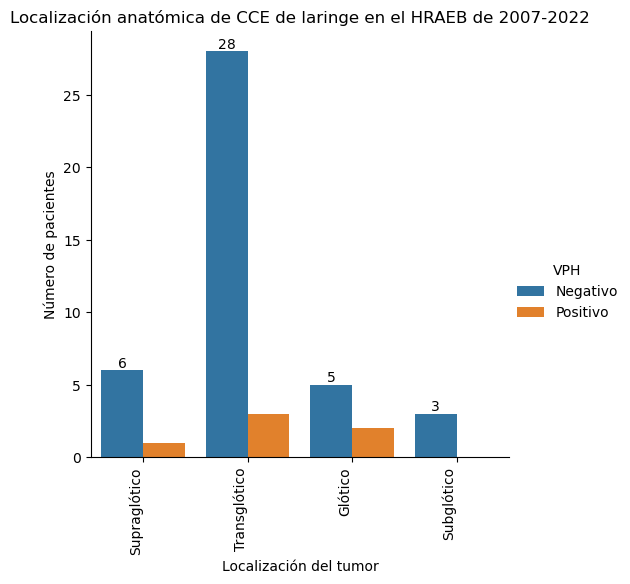

In [801]:
v = sns.catplot(x= 'Localización del tumor', kind='count', data=df, hue='VPH')
for ax in v.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Localización anatómica de CCE de laringe en el HRAEB de 2007-2022')
    plt.xticks(rotation=90, ha='right')
    plt.show(v)

In [1036]:
df0=df[['Supervivencia desde el dx (meses)', 'Estado actual']].dropna()
kmf= KaplanMeierFitter()
kmf.fit(durations=df0['Supervivencia desde el dx (meses)'], event_observed=df0['Estado actual'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 41 total observations, 11 right-censored observations>

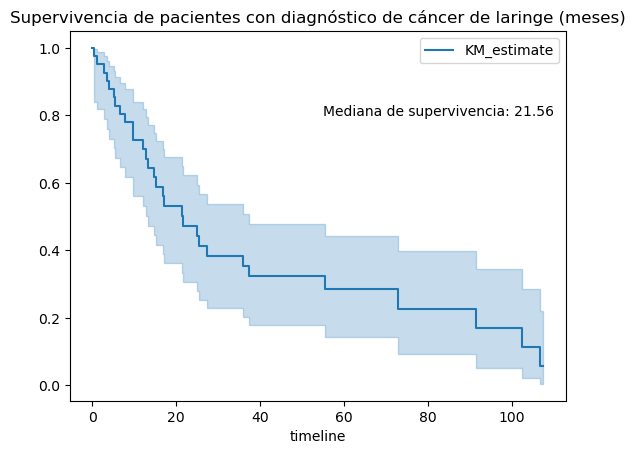

In [1037]:
kmf.plot_survival_function()
plt.title('Supervivencia de pacientes con diagnóstico de cáncer de laringe (meses)')
plt.text(55,0.8, 'Mediana de supervivencia: 21.56')
plt.show()


In [1038]:
print(kmf.median_survival_time_)

21.56666667


In [1039]:
from lifelines.utils import median_survival_times
print(median_survival_times(kmf.confidence_interval_))

     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5               13.166667                    37.3


In [1040]:
kmf.predict([12,36,60])

12    0.700147
36    0.354741
60    0.284532
Name: KM_estimate, dtype: float64

In [806]:
df2=pd.DataFrame(df[['Consumo de tabaco', 'Supervivencia desde el dx (meses)', 'Estado actual']].dropna())
tabaquismo= df2['Consumo de tabaco']== 'Sí'
no_tab= df2['Consumo de tabaco']=='No'

fumadores: 24.86666667
no fumadores: 17.03333333


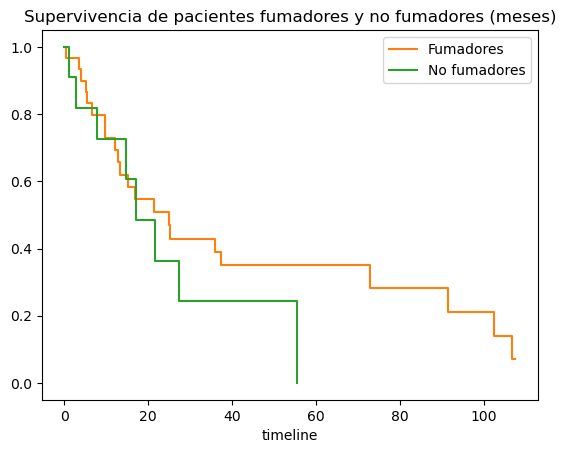

In [807]:
ax=plt.subplot(111)
fum_kmf=kmf.fit(durations=df2[tabaquismo]['Supervivencia desde el dx (meses)'], event_observed=df2[tabaquismo]['Estado actual'], label='Fumadores')
fum_kmf.plot_survival_function(ax=ax, ci_show=False)
print('fumadores:',fum_kmf.median_survival_time_)
nofum_kmf=kmf.fit(durations=df2[~tabaquismo]['Supervivencia desde el dx (meses)'], event_observed=df2[~tabaquismo]['Estado actual'], label='No fumadores')
nofum_kmf.plot_survival_function(ax=ax, ci_show=False)
print('no fumadores:', nofum_kmf.median_survival_time_)
plt.title('Supervivencia de pacientes fumadores y no fumadores (meses)')
plt.show()



In [808]:
fum_kmf=kmf.fit(durations=df2[tabaquismo]['Supervivencia desde el dx (meses)'], event_observed=df2[tabaquismo]['Estado actual'], label='Fumadores')
fum_kmf.predict([12,36,60])

12    0.692708
36    0.390625
60    0.351563
Name: Fumadores, dtype: float64

In [809]:
nofum_kmf=kmf.fit(durations=df2[~tabaquismo]['Supervivencia desde el dx (meses)'], event_observed=df2[~tabaquismo]['Estado actual'], label='No fumadores')
nofum_kmf.predict([12,36,60])

12    0.727273
36    0.242424
60    0.000000
Name: No fumadores, dtype: float64

In [810]:
df3=pd.DataFrame(df[['VPH', 'Supervivencia desde el dx (meses)', 'Estado actual']].dropna())
vphpos= df3['VPH']== 'Positivo'
vphneg= df3['VPH']=='Negativo'

VPH positivo: 36.0
VPH negativo: 17.03333333


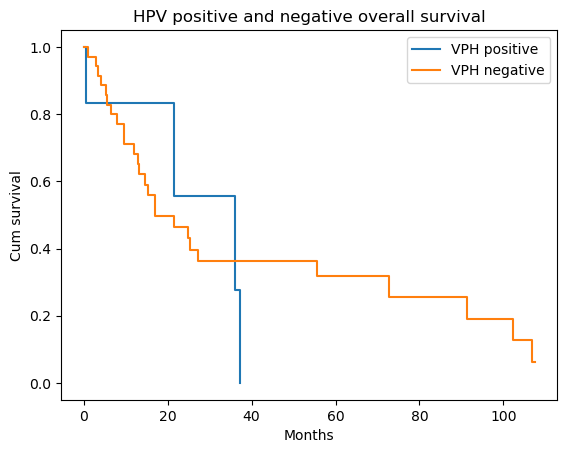

In [811]:
ax=plt.subplot(111)
vphpos_kmf=kmf.fit(durations=df3[vphpos]['Supervivencia desde el dx (meses)'], event_observed=df3[vphpos]['Estado actual'], label='VPH positive')
vphpos_kmf.plot_survival_function(ax=ax, ci_show=False)
print('VPH positivo:', vphpos_kmf.median_survival_time_)

novph_kmf=kmf.fit(durations=df3[~vphpos]['Supervivencia desde el dx (meses)'], event_observed=df3[~vphpos]['Estado actual'], label='VPH negative')
novph_kmf.plot_survival_function(ax=ax, ci_show=False)
print('VPH negativo:', novph_kmf.median_survival_time_)
plt.title('HPV positive and negative overall survival')
plt.xlabel('Months')
plt.ylabel('Cum survival')
plt.show()

In [812]:
df3[vphpos]['Supervivencia desde el dx (meses)'].median()

16.233333335

In [813]:
sup_vph= df3[df3['VPH']=='Positivo']['Supervivencia desde el dx (meses)']
sup_no_vph=df3[df3['VPH']=='Negativo']['Supervivencia desde el dx (meses)']
event_vph= df3[df3['VPH']=='Positivo']['Estado actual']
event_no_vph= df3[df3['VPH']=='Negativo']['Estado actual']

In [814]:
from lifelines.statistics import logrank_test
resultados=logrank_test(sup_vph, sup_no_vph, event_vph, event_no_vph, alpha=0.95)
resultados.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.14 0.71      0.50

In [815]:
from lifelines.statistics import survival_difference_at_fixed_point_in_time_test


T_exp, E_exp = sup_vph, event_vph
T_con, E_con = sup_no_vph, event_no_vph

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time =6
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 6
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 6 total observations, 2 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 35 total observations, 9 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.00 0.98      0.03

In [816]:
kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time =12
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 12
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 6 total observations, 2 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 35 total observations, 9 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.34 0.56      0.84

In [817]:
vphpos_kmf=kmf.fit(durations=df3[vphpos]['Supervivencia desde el dx (meses)'], event_observed=df3[vphpos]['Estado actual'], label='VPH positivo')
vphpos_kmf.predict([12,36,60])

12    0.833333
36    0.277778
60    0.000000
Name: VPH positivo, dtype: float64

In [818]:
vphneg_kmf=kmf.fit(durations=df3[~vphpos]['Supervivencia desde el dx (meses)'], event_observed=df3[~vphpos]['Estado actual'], label='VPH negativo')
vphneg_kmf.predict([12,36,60])

12    0.682418
36    0.363956
60    0.318462
Name: VPH negativo, dtype: float64

In [819]:
kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time =24
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 24
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 6 total observations, 2 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 35 total observations, 9 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.08 0.78      0.37

In [820]:
kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time =36
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 36
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 6 total observations, 2 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 35 total observations, 9 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.12 0.73      0.45

In [821]:
kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time =60
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 60
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 6 total observations, 2 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 35 total observations, 9 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic      p  -log2(p)
            inf <0.005       inf

In [822]:
import pingouin

In [823]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='VPH', y='Consumo de tabaco', correction=False)
print(observed)

Consumo de tabaco  No  Sí
VPH                      
Negativo           11  31
Positivo            1   5


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [824]:
print(expected)

Consumo de tabaco    No    Sí
VPH                          
Negativo           10.5  31.5
Positivo            1.5   4.5


In [825]:
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.253968  1.0  0.614295  0.071270  0.079566
1        cressie-read  0.666667  0.260187  1.0  0.609992  0.072137  0.080301
2      log-likelihood  0.000000  0.274094  1.0  0.600599  0.074040  0.081946
3       freeman-tukey -0.500000  0.285968  1.0  0.592816  0.075626  0.083352
4  mod-log-likelihood -1.000000  0.299252  1.0  0.584352  0.077363  0.084927
5              neyman -2.000000  0.330792  1.0  0.565193  0.081338  0.088675


In [826]:
pingouin.anova(data=df, dv='Supervivencia desde el dx (meses)', between='VPH')

,Source,ddof1,ddof2,F,p-unc,np2
0,VPH,1,44,0.713729,0.402779,0.015962


In [827]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='VPH', y='Consumo de alcohol', correction=True)
print(observed)

Consumo de alcohol    No    Sí
VPH                           
Negativo            15.5  26.5
Positivo             2.5   3.5


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [828]:
print(expected)

Consumo de alcohol     No     Sí
VPH                             
Negativo            15.75  26.25
Positivo             2.25   3.75


In [829]:
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.050794  1.0  0.821688  0.031873  0.055839
1        cressie-read  0.666667  0.050594  1.0  0.822034  0.031810  0.055816
2      log-likelihood  0.000000  0.050215  1.0  0.822689  0.031691  0.055772
3       freeman-tukey -0.500000  0.049950  1.0  0.823150  0.031607  0.055742
4  mod-log-likelihood -1.000000  0.049701  1.0  0.823585  0.031528  0.055713
5              neyman -2.000000  0.049248  1.0  0.824377  0.031384  0.055661


In [830]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='VPH', y='Localización del tumor', correction=True)
print(observed)

Localización del tumor  Glótico  Subglótico  Supraglótico  Transglótico
VPH                                                                    
Negativo                      5           3             6            28
Positivo                      2           0             1             3


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [831]:
print(expected)

Localización del tumor  Glótico  Subglótico  Supraglótico  Transglótico
VPH                                                                    
Negativo                  6.125       2.625         6.125        27.125
Positivo                  0.875       0.375         0.875         3.875


In [832]:
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  2.327847  3.0  0.507207  0.215771  0.218841
1        cressie-read  0.666667  2.261814  3.0  0.519876  0.212688  0.213441
2      log-likelihood  0.000000  2.340452  3.0  0.504816  0.216354  0.219874
3       freeman-tukey -0.500000       NaN  3.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000       inf  3.0  0.000000       inf  1.000000
5              neyman -2.000000       NaN  3.0       NaN       NaN       NaN


In [833]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='VPH', y='Diferenciación ', correction=True)
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  2.684807  2.0  0.261217  0.231724  0.291284
1        cressie-read  0.666667  2.290114  2.0  0.318206  0.214015  0.253330
2      log-likelihood  0.000000  1.771404  2.0  0.412425  0.188223  0.203822
3       freeman-tukey -0.500000  1.537508  2.0  0.463590  0.175357  0.181837
4  mod-log-likelihood -1.000000  1.388581  2.0  0.499429  0.166648  0.168004
5              neyman -2.000000  1.253490  2.0  0.534328  0.158334  0.155591


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [834]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='VPH', y='Queratinización ', correction=True)
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.175824  1.0  0.674987  0.059300  0.070374
1        cressie-read  0.666667  0.171985  1.0  0.678353  0.058649  0.069925
2      log-likelihood  0.000000  0.164915  1.0  0.684671  0.057431  0.069097
3       freeman-tukey -0.500000  0.160101  1.0  0.689064  0.056586  0.068534
4  mod-log-likelihood -1.000000  0.155668  1.0  0.693177  0.055797  0.068016
5              neyman -2.000000  0.147826  1.0  0.700622  0.054374  0.067100


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [835]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='VPH', y='Extensión extracapsular', correction=True)
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.107143  1.0  0.743421  0.046291  0.062362
1        cressie-read  0.666667  0.103358  1.0  0.747837  0.045466  0.061922
2      log-likelihood  0.000000  0.096596  1.0  0.755954  0.043954  0.061138
3       freeman-tukey -0.500000  0.092150  1.0  0.761461  0.042930  0.060622
4  mod-log-likelihood -1.000000  0.088174  1.0  0.766511  0.041994  0.060161
5              neyman -2.000000  0.081429  1.0  0.775370  0.040356  0.059379


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [836]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='VPH', y='Invasión linfovascular', correction=True)
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.187717  1.0  0.664823  0.061273  0.071768
1        cressie-read  0.666667  0.184237  1.0  0.667757  0.060702  0.071360
2      log-likelihood  0.000000  0.177867  1.0  0.673213  0.059643  0.070614
3       freeman-tukey -0.500000  0.173567  1.0  0.676961  0.058918  0.070110
4  mod-log-likelihood -1.000000  0.169640  1.0  0.680432  0.058248  0.069650
5              neyman -2.000000  0.162798  1.0  0.686593  0.057061  0.068850


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [837]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='VPH', y='Invasión perineural', correction=True)
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.012401  1.0  0.911332  0.015749  0.051422
1        cressie-read  0.666667  0.012425  1.0  0.911245  0.015764  0.051425
2      log-likelihood  0.000000  0.012476  1.0  0.911065  0.015796  0.051430
3       freeman-tukey -0.500000  0.012516  1.0  0.910924  0.015821  0.051435
4  mod-log-likelihood -1.000000  0.012557  1.0  0.910779  0.015847  0.051440
5              neyman -2.000000  0.012643  1.0  0.910473  0.015902  0.051450


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [838]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='VPH', y='Invasión a cartílago', correction=True)
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  1.110250  1.0  0.292028  0.149013  0.183684
1        cressie-read  0.666667  1.097797  1.0  0.294750  0.148175  0.182146
2      log-likelihood  0.000000  1.084544  1.0  0.297683  0.147278  0.180509
3       freeman-tukey -0.500000  1.084544  1.0  0.297683  0.147278  0.180509
4  mod-log-likelihood -1.000000  1.093036  1.0  0.295799  0.147854  0.181558
5              neyman -2.000000  1.136412  1.0  0.286412  0.150759  0.186917


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [839]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='VPH', y='M', correction=True)
print(observed)

M           M0   M1
VPH                
Negativo  36.5  5.5
Positivo   5.5  0.5


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [840]:
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.108844  1.0  0.741465  0.046657  0.062560
1        cressie-read  0.666667  0.112216  1.0  0.737635  0.047374  0.062952
2      log-likelihood  0.000000  0.119680  1.0  0.729382  0.048924  0.063820
3       freeman-tukey -0.500000  0.125986  1.0  0.722631  0.050197  0.064554
4  mod-log-likelihood -1.000000  0.132986  1.0  0.715356  0.051572  0.065369
5              neyman -2.000000  0.149440  1.0  0.699071  0.054670  0.067289


In [841]:
expected1, observed1, stats1= pingouin.chi2_independence(data=df, x='VPH', y='Estadio clínico', correction=True)
print(observed)

M           M0   M1
VPH                
Negativo  36.5  5.5
Positivo   5.5  0.5


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [842]:
print(expected1)

Estadio clínico         I        II      III         IV
VPH                                                    
Negativo         3.574468  1.787234  8.93617  27.702128
Positivo         0.425532  0.212766  1.06383   3.297872


In [843]:
print(stats1)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  7.977727  3.0  0.046474  0.399443  0.652754
1        cressie-read  0.666667  7.057869  3.0  0.070076  0.375709  0.593523
2      log-likelihood  0.000000  6.597990  3.0  0.085877  0.363263  0.561646
3       freeman-tukey -0.500000       NaN  3.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000       inf  3.0  0.000000       inf  1.000000
5              neyman -2.000000       NaN  3.0       NaN       NaN       NaN


In [844]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='VPH', y='Subtipo histológico', correction=True)
print(observed)

Subtipo histológico  ADENOCARCINOMA  CONVENCIONAL  VERRUGOSO
VPH                                                         
Negativo                          1            40          1
Positivo                          0             5          1


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [845]:
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  2.793651  2.0  0.247381  0.236375  0.301742
1        cressie-read  0.666667  2.423042  2.0  0.297744  0.220138  0.266106
2      log-likelihood  0.000000  2.002458  2.0  0.367428  0.200123  0.225779
3       freeman-tukey -0.500000       NaN  2.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000       inf  2.0  0.000000       inf  1.000000
5              neyman -2.000000       NaN  2.0       NaN       NaN       NaN


In [846]:
x= df[df['VPH']=='Positivo']['Índice tabáquico']
y= df[df['VPH']=='Negativo']['Índice tabáquico']

In [847]:
pingouin.mwu(x, y, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,11.0,two-sided,0.249171,0.521739,0.23913


In [848]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='VPH', y='Sexo', correction=True)
print(observed)

Sexo      Femenino  Masculino
VPH                          
Negativo       1.5       40.5
Positivo       0.5        5.5


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [849]:
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.298137  1.0  0.585053  0.077219  0.084795
1        cressie-read  0.666667  0.277446  1.0  0.598380  0.074491  0.082342
2      log-likelihood  0.000000  0.243275  1.0  0.621850  0.069753  0.078304
3       freeman-tukey -0.500000  0.222752  1.0  0.636951  0.066746  0.075885
4  mod-log-likelihood -1.000000  0.205695  1.0  0.650162  0.064140  0.073879
5              neyman -2.000000  0.179574  1.0  0.671740  0.059929  0.070814


In [850]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='VPH', y='T', correction=True)
print(observed)

T         T1  T2  T3  T4
VPH                     
Negativo   3   3  11  25
Positivo   2   0   1   2


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [851]:
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.254965  3.0  0.154052  0.324190  0.460784
1        cressie-read  0.666667  4.640856  3.0  0.200065  0.304659  0.411464
2      log-likelihood  0.000000  3.982256  3.0  0.263386  0.282215  0.357053
3       freeman-tukey -0.500000       NaN  3.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000       inf  3.0  0.000000       inf  1.000000
5              neyman -2.000000       NaN  3.0       NaN       NaN       NaN


In [852]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='VPH', y='N', correction=True)
print(observed)

N         N0  N1  N2  N3
VPH                     
Negativo  18   6  11   2
Positivo   2   0   2   1


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [853]:
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  2.343617  3.0  0.504216  0.216500  0.220133
1        cressie-read  0.666667  2.334248  3.0  0.505992  0.216067  0.219365
2      log-likelihood  0.000000  2.677141  3.0  0.444126  0.231393  0.247682
3       freeman-tukey -0.500000       NaN  3.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000       inf  3.0  0.000000       inf  1.000000
5              neyman -2.000000       NaN  3.0       NaN       NaN       NaN


In [854]:
pingouin.normality(df['Edad'], method='normaltest')

,W,pval,normal
Edad,1.091756,0.579333,True


In [855]:
pingouin.normality(df['Índice tabáquico'], method='normaltest')

,W,pval,normal
Índice tabáquico,19.912562,0.000047,False


In [856]:
pingouin.normality(df['Tiempo de exposición al tabaco (años)'], method='normaltest')

,W,pval,normal
Tiempo de exposición al tabaco (años),1.744189,0.418075,True


In [857]:
pingouin.normality(df['Tiempo de exposición al alcohol (años)'], method='normaltest')

C:\Users\HUAWEI\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,W,pval,normal
Tiempo de exposición al alcohol (años),0.635065,0.727943,True


In [858]:
x= df[df['VPH']=='Positivo']['Edad']
y= df[df['VPH']=='Negativo']['Edad']
pingouin.ttest(x, y, paired=False, alternative='two-sided', correction='auto', confidence=0.95 )

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.838371,5.941076,two-sided,0.43425,"[-19.25, 9.45]",0.435391,0.5,0.164441


In [859]:
x= df[df['VPH']=='Positivo']['Tiempo de exposición al tabaco (años)']
y= df[df['VPH']=='Negativo']['Tiempo de exposición al tabaco (años)']
pingouin.ttest(x, y, paired=False, alternative='two-sided', correction='auto', confidence=0.95 )

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.276642,2.316782,two-sided,0.804824,"[-44.55, 51.58]",0.199753,0.493,0.061524


In [860]:
x= df[df['VPH']=='Positivo']['Tiempo de exposición al alcohol (años)']
y= df[df['VPH']=='Negativo']['Tiempo de exposición al alcohol (años)']
pingouin.ttest(x, y, paired=False, alternative='two-sided', correction='auto', confidence=0.95 )

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.68445,2.123599,two-sided,0.22685,"[-31.41, 13.03]",0.848083,1.122,0.178997


In [861]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='VPH', y='Procedencia', correction=True)
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.350000  1.0  0.554113  0.083666  0.090962
1        cressie-read  0.666667  0.355178  1.0  0.551196  0.084283  0.091580
2      log-likelihood  0.000000  0.366976  1.0  0.544657  0.085671  0.092987
3       freeman-tukey -0.500000  0.377206  1.0  0.539102  0.086857  0.094209
4  mod-log-likelihood -1.000000  0.388749  1.0  0.532957  0.088176  0.095589
5              neyman -2.000000  0.416327  1.0  0.518776  0.091250  0.098891


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [862]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='VPH', y='Escolaridad', correction=True)
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.210630  2.0  0.900041  0.064905  0.066174
1        cressie-read  0.666667  0.228988  2.0  0.891817  0.067674  0.067620
2      log-likelihood  0.000000  0.303387  2.0  0.859252  0.077896  0.073537
3       freeman-tukey -0.500000       NaN  2.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000       inf  2.0  0.000000       inf  1.000000
5              neyman -2.000000       NaN  2.0       NaN       NaN       NaN


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [863]:
# importing packages
import scipy.stats as stats

# Estadio 4 vs no estadio 4
data = [[3,2], [28,14]]
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data, alternative='less')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))


odd ratio is : 0.75
p_value is : 0.5610314360610168


In [864]:
print(observed1)

Estadio clínico  I  II  III  IV
VPH                            
Negativo         2   2   10  28
Positivo         2   0    0   3


In [865]:
from scipy.stats import fisher_exact

res = fisher_exact(data, alternative='greater')
print(res)

(0.75, 0.7906122733694104)


In [866]:
# Metastasis
data = [[1,5], [1,37]]
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 7.4
p_value is : 0.25687103594080335


In [867]:
# CCE verrugoso
data = [[1,5], [1,40]]
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 8.0
p_value is : 0.24144310823311751


In [868]:
# Supraglotico vs no supraglotico
data = [[1,2], [6,8]]
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data, alternative= 'greater')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 0.6666666666666666
p_value is : 0.8235294117647058


In [869]:
res = stats.barnard_exact([[3,2], [28,14]], alternative="less")
print(res)
#Estadio

BarnardExactResult(statistic=-0.2973900808955366, pvalue=0.43810989851688475)


In [870]:
res = stats.barnard_exact([[1,5], [1,37]], alternative="two-sided")
print(res)
#metastasis

BarnardExactResult(statistic=1.5338018244736062, pvalue=0.14714009391896765)


In [871]:
res = stats.barnard_exact([[1,5], [1,41]], alternative="greater")
print(res)
#subtipo

BarnardExactResult(statistic=1.6380567186958443, pvalue=0.13464083273762453)


In [872]:
res = stats.barnard_exact([[1,2], [6,8]], alternative="less")
print(res)
#anatomia

BarnardExactResult(statistic=-0.30416608424135844, pvalue=0.4525170314366417)


In [873]:
res = stats.barnard_exact([[4,2], [26,16]], alternative="greater")
print(res)
#alcoholismo

BarnardExactResult(statistic=0.2253744679276045, pvalue=0.45284199877058784)


In [874]:
res = stats.barnard_exact([[5,1], [31,11]], alternative="greater")
print(res)
#tabaquismo

BarnardExactResult(statistic=0.5039526306789698, pvalue=0.47602294753691066)


In [875]:
tabla=pd.crosstab(index=df['VPH'], columns=df['Estadio'])
print(tabla)

Estadio   01-feb  03-abr
VPH                     
Negativo       4      38
Positivo       2       3


In [876]:
odd_ratio, p_value = stats.fisher_exact(tabla, alternative='less')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))
#estadio 2

odd ratio is : 0.15789473684210525
p_value is : 0.1153377024770868


In [877]:
res = stats.barnard_exact(tabla, alternative="less")
print(res)

BarnardExactResult(statistic=-1.930419527177913, pvalue=0.05888228982016833)


In [878]:
stats.boschloo_exact(tabla, alternative="less")

BoschlooExactResult(statistic=0.1153377024770868, pvalue=0.06132310146739027)

In [879]:
res = stats.barnard_exact([[3,2], [36,6]], alternative="two-sided")
print(res)
#T

BarnardExactResult(statistic=-1.446291202268147, pvalue=0.16701385822547885)


In [880]:
res = stats.barnard_exact([[3,2], [19,18]], alternative="two-sided")
print(res)
#N

BarnardExactResult(statistic=0.36343975028669057, pvalue=0.766908227844179)


In [881]:
res = stats.barnard_exact([[6,0], [40,2]], alternative="greater")
print(res)

BarnardExactResult(statistic=0.546018906231948, pvalue=0.5889594681668764)


In [882]:
res = stats.barnard_exact([[3,3], [25,17]], alternative="two-sided")
print(res)

BarnardExactResult(statistic=-0.4426266681379905, pvalue=0.715752707520945)


In [883]:
res = stats.barnard_exact([[1,5], [1,41]], alternative="greater")
print(res)

BarnardExactResult(statistic=1.6380567186958443, pvalue=0.13464083273762453)


In [884]:
res = stats.barnard_exact([[4,2], [35,7]], alternative="less")
print(res)

BarnardExactResult(statistic=-0.978399180940457, pvalue=0.2249204761811902)


In [885]:
res = stats.barnard_exact([[3,0], [24,9]], alternative="two-sided")
print(res)

BarnardExactResult(statistic=1.044465935734187, pvalue=0.3646676226178593)


In [886]:
data = [[3,0], [24,9]]
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : inf
p_value is : 0.5575630252100839


In [887]:
data = [[1,5], [1,40]]
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 8.0
p_value is : 0.24144310823311751


In [888]:
stats.boschloo_exact([[2, 2], [38, 4]], alternative="less")

BoschlooExactResult(statistic=0.07669209792566718, pvalue=0.036268942947317424)

In [889]:
data= [[2,3], [2,40]]
odd_ratio, p_value = stats.fisher_exact(data, alternative='greater')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))
#estadio 2

odd ratio is : 13.333333333333334
p_value is : 0.05065455666750764


In [890]:
res = stats.barnard_exact([[2,3], [2,40]], alternative="greater")
print(res)

BarnardExactResult(statistic=2.669357723007096, pvalue=0.03477617984268745)


In [891]:
import math

def _dfs(mat, pos, r_sum, c_sum, p_0, p):

    (xx, yy) = pos
    (r, c) = (len(r_sum), len(c_sum))

    mat_new = []

    for i in range(len(mat)):
        temp = []
        for j in range(len(mat[0])):
            temp.append(mat[i][j])
        mat_new.append(temp)

    if xx == -1 and yy == -1:
        for i in range(r-1):
            temp = r_sum[i]
            for j in range(c-1):
                temp -= mat_new[i][j]
            mat_new[i][c-1] = temp
        for j in range(c-1):
            temp = c_sum[j]
            for i in range(r-1):
                temp -= mat_new[i][j]
            mat_new[r-1][j] = temp
        temp = r_sum[r-1]
        for j in range(c-1):
            temp -= mat_new[r-1][j]
        if temp <0:
            return
        mat_new[r-1][c-1] = temp

        p_1 = 1
        for x in r_sum:
            p_1 *= math.factorial(x)
        for y in c_sum:
            p_1 *= math.factorial(y)

        n = 0
        for x in r_sum:
            n += x
        p_1 /= math.factorial(n)

        for i in range(len(mat_new)):
            for j in range(len(mat_new[0])):
                p_1 /= math.factorial(mat_new[i][j])
        if p_1 <= p_0 + 0.00000001:
            #print(mat_new)
            #print(p_1)
            p[0] += p_1
    else:
        max_1 = r_sum[xx]
        max_2 = c_sum[yy]
        for j in range(c):
            max_1 -= mat_new[xx][j]
        for i in range(r):
            max_2 -= mat_new[i][yy]
        for k in range(min(max_1,max_2)+1):
            mat_new[xx][yy] = k
            if xx == r-2 and yy == c-2:
                pos_new = (-1, -1)
            elif xx == r-2:
                pos_new = (0, yy+1)
            else:
                pos_new = (xx+1, yy)
            _dfs(mat_new, pos_new, r_sum, c_sum, p_0, p)


def fisher_exact(table):

    row_sum = []
    col_sum = []

    for i in range(len(table)):
        temp = 0
        for j in range(len(table[0])):
            temp += table[i][j]
        row_sum.append(temp)
    
    for j in range(len(table[0])):
        temp = 0
        for i in range(len(table)):
            temp += table[i][j]
        col_sum.append(temp)

    mat = [[0] * len(col_sum)] * len(row_sum)
    pos = (0, 0)

    p_0 = 1

    for x in row_sum:
        p_0 *= math.factorial(x)
    for y in col_sum:
        p_0 *= math.factorial(y)

    n = 0
    for x in row_sum:
        n += x
    p_0 /= math.factorial(n)

    for i in range(len(table)):
        for j in range(len(table[0])):
            p_0 /= math.factorial(table[i][j])

    p = [0]
    _dfs(mat, pos, row_sum, col_sum, p_0, p)

    return p[0]

In [892]:
print(fisher_exact([[3,2,1],[26,16,1]]))

0.285208200679986


In [893]:
from scipy.stats import somersd

table = [[26,16,1], [3, 2, 1]]

res = somersd(table, alternative='two-sided')

In [894]:
print(res.statistic)
print(res.pvalue)

0.15891472868217055
0.5202742619895693


In [895]:
x= np.array([3,2,1])
y= np.array([26,16,1])

In [896]:
from scipy import stats

res = stats.kendalltau(x, y, method='exact', alternative='two-sided')

In [897]:
print(res)

KendalltauResult(correlation=1.0, pvalue=0.3333333333333333)


In [898]:
from scipy.stats import chi2_contingency
table = np.array([[26,16,1],[3,2,1]])
chi2_contingency(table, correction=True)


(2.772067777480768,
 0.2500651265763456,
 2,
 array([[25.44897959, 15.79591837,  1.75510204],
        [ 3.55102041,  2.20408163,  0.24489796]]))

In [899]:
# sexo
data = [[0,6],[2,40]]
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 0.0
p_value is : 1.0


In [900]:
# procedencia
data = [[1,5],[14,22]]
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 0.3142857142857143
p_value is : 0.3950143982236408


In [901]:
# procedencia
data = [[1,5],[14,22]]
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 0.3142857142857143
p_value is : 0.3950143982236408


In [902]:
#tabaquismo

data = [[5,1],[31,11]]
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data, alternative='greater')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 1.7741935483870968
p_value is : 0.527375599681604


In [903]:
#alcoholismo

data = [[4,2],[26,16]]
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data, alternative='greater')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 1.2307692307692308
p_value is : 0.5990987907602583


In [904]:
#queratinización

data = [[4,2],[35,7]]
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data, alternative='greater')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 0.4
p_value is : 0.9294267894616409


In [905]:
#perineural

data = [[2,4],[13,29]]
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data, alternative='less')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 1.1153846153846154
p_value is : 0.7304892828202425


In [906]:
#linfovascular

data = [[3,3],[21,21]]
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data, alternative='less')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 1.0
p_value is : 0.6669140689427676


In [907]:
#Importar base de datos 
vph=pd.read_csv('base de datos vph cod.csv', infer_datetime_format=True)
print(vph.columns)


Index(['# paciente', 'Peso (kg)', 'Talla (m)', 'IMC (kg/m2)', 'Edad',
       'Obesidad ', 'Diabetes ', 'HAS', 'ERGE', 'Consumo de alcohol',
       'Tiempo de exposición al alcohol (años)', 'Consumo de tabaco',
       'Tiempo de exposición al tabaco (años)', 'Cigarrillos por día',
       'Índice tabáquico', 'Metástasis a distancia', 'Resección quirúrgica',
       'Quimioterapia', 'Radioterapia', 'Recurrencia locorregional',
       'Estado actual', 'Supervivencia desde el dx (meses)', 'VPH'],
      dtype='object')


In [908]:
vph= vph.dropna(subset=['Peso (kg)', 'Talla (m)', 'IMC (kg/m2)', 'Edad', 'Obesidad ', 'Diabetes ', 'HAS', 'ERGE',
                        'Consumo de alcohol', 'Tiempo de exposición al alcohol (años)','Consumo de tabaco', 
                        'Tiempo de exposición al tabaco (años)','Índice tabáquico', 'Metástasis a distancia', 
                        'Quimioterapia', 'Radioterapia', 'Estado actual', 'Supervivencia desde el dx (meses)'])
print (vph.head())

    # paciente  Peso (kg)  Talla (m)  IMC (kg/m2)  Edad  Obesidad   Diabetes   \
0            2       59.1       1.64    21.973528    70          0          0   
18          25       75.7       1.67    27.143318    64          0          0   
19          26       81.0       1.63    30.486657    73          1          0   
22          31       69.0       1.53    29.475843    62          0          0   
24          34       84.0       1.76    27.117769    51          0          0   

    HAS  ERGE  Consumo de alcohol  ...  Cigarrillos por día  Índice tabáquico  \
0     0     0                   1  ...                 60.0             186.0   
18    0     0                   1  ...                  2.0               5.0   
19    1     0                   1  ...                 40.0             110.0   
22    0     0                   1  ...                 40.0              76.0   
24    0     0                   1  ...                 20.0              36.0   

    Metástasis a distancia

In [909]:
pd.isnull(vph).any()

# paciente                                False
Peso (kg)                                 False
Talla (m)                                 False
IMC (kg/m2)                               False
Edad                                      False
Obesidad                                  False
Diabetes                                  False
HAS                                       False
ERGE                                      False
Consumo de alcohol                        False
Tiempo de exposición al alcohol (años)    False
Consumo de tabaco                         False
Tiempo de exposición al tabaco (años)     False
Cigarrillos por día                       False
Índice tabáquico                          False
Metástasis a distancia                    False
Resección quirúrgica                      False
Quimioterapia                             False
Radioterapia                              False
Recurrencia locorregional                 False
Estado actual                           

In [910]:
vph= vph[['Edad', 'Tiempo de exposición al alcohol (años)', 
        'Tiempo de exposición al tabaco (años)','Índice tabáquico', 'VPH','Estado actual', 
         'Supervivencia desde el dx (meses)', 'Resección quirúrgica', 'Quimioterapia', 'Radioterapia']]

In [911]:
cph = CoxPHFitter(penalizer=0.1)

cph.fit(vph,"Supervivencia desde el dx (meses)",event_col="Estado actual")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 9 total observations, 2 right-censored observations>
             duration col = 'Supervivencia desde el dx (meses)'
                event col = 'Estado actual'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 9
number of events observed = 7
   partial log-likelihood = -5.58
         time fit was run = 2023-07-19 14:26:41 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                      
Edad                                    -0.02       0.98       0.09            -0.21             0.16                 0.81                 1.18
Tiempo de exposición al alcohol (años)  -0.01       0.99       0.05            -0.10             0.09                 0.90                 1.10
Tiempo de exposición al tabaco (años)    0.06       1.06       0.07            -0.07             0.19                 0.94                 1.21
Índice tabáquico                        -0.02       0.98       0.01            -0.04            -0.00                 0.96                 1.00
VPH                                      0.00       1.00       3.16            -6.20             6.20                 0.00               491.74
Resección quirúrgica                    -0.89       0.41       1.24            -3.31             1.54                 0.04                 4.66
Quimioterapia                           -1.44       0.24       1.46            -4.30             1.41                 0.01                 4.11
Radioterapia                             1.15       3.17       1.21            -1.22             3.53                 0.30                34.03

                                         cmp to     z    p   -log2(p)
covariate                                                            
Edad                                       0.00 -0.22 0.83       0.28
Tiempo de exposición al alcohol (años)     0.00 -0.12 0.91       0.14
Tiempo de exposición al tabaco (años)      0.00  0.95 0.34       1.56
Índice tabáquico                           0.00 -2.00 0.05       4.47
VPH                                        0.00  0.00 1.00      -0.00
Resección quirúrgica                       0.00 -0.72 0.47       1.08
Quimioterapia                              0.00 -0.99 0.32       1.64
Radioterapia                               0.00  0.95 0.34       1.55
---
Concordance = 0.96
Partial AIC = 27.16
log-likelihood ratio test = 7.85 on 8 df
-log2(p) of ll-ratio test = 1.16

In [912]:
vph['Cirugía']= vph['Resección quirúrgica']
vph2=pd.get_dummies(vph)
print(vph2)


    Edad  Tiempo de exposición al alcohol (años)  \
0     70                                    58.0   
18    64                                    50.0   
19    73                                    47.0   
22    62                                    30.0   
24    51                                    20.0   
29    78                                    52.0   
31    65                                    30.0   
45    59                                    25.0   
46    67                                    27.0   

    Tiempo de exposición al tabaco (años)  Índice tabáquico  VPH  \
0                                    62.0            186.00    0   
18                                   50.0              5.00    0   
19                                   55.0            110.00    0   
22                                   38.0             76.00    0   
24                                   36.0             36.00    0   
29                                   70.0             70.00    0   
31 

In [913]:
penalty=[0,0.5]
cph = CoxPHFitter(penalizer=0.1)
cph.fit(vph2,"Supervivencia desde el dx (meses)",event_col="Estado actual", 
        formula='Quimioterapia + Radioterapia + Cirugía + Quimioterapia * VPH + Cirugía * VPH + Cirugía * VPH')
cph.print_summary()

C:\Users\HUAWEI\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1102: ConvergenceWarning: Column(s) ['Cirugía:VPH', 'Quimioterapia:VPH'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\HUAWEI\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column Radioterapia have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['Estado actual'].astype(bool)
>>> print(df.loc[events, 'Radioterapia'].var())
>>> print(df.loc[~events, 'Radioterapia'].var())

A very low variance means that the column Radioterapia completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/

ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.

In [914]:
df5=pd.DataFrame(df[['Resección quirúrgica', 'Supervivencia desde el dx (meses)', 'Estado actual','VPH']].dropna())
print(df5)


   Resección quirúrgica  Supervivencia desde el dx (meses)  Estado actual  \
0                    No                          25.300000            1.0   
1                    Sí                           9.666667            1.0   
3                    Sí                          14.633333            1.0   
4                    No                           2.800000            1.0   
5                    Sí                           1.033333            1.0   
7                    Sí                           5.400000            1.0   
8                    Sí                          36.000000            1.0   
9                    Sí                          48.700000            0.0   
11                   Sí                           3.966667            1.0   
12                   Sí                          12.866667            1.0   
13                   Sí                          91.433333            1.0   
15                   Sí                           9.633333            1.0   

In [915]:
cx=df5[df5['Resección quirúrgica']=='Sí']
print(cx)

   Resección quirúrgica  Supervivencia desde el dx (meses)  Estado actual  \
1                    Sí                           9.666667            1.0   
3                    Sí                          14.633333            1.0   
5                    Sí                           1.033333            1.0   
7                    Sí                           5.400000            1.0   
8                    Sí                          36.000000            1.0   
9                    Sí                          48.700000            0.0   
11                   Sí                           3.966667            1.0   
12                   Sí                          12.866667            1.0   
13                   Sí                          91.433333            1.0   
15                   Sí                           9.633333            1.0   
18                   Sí                          16.833333            1.0   
19                   Sí                          72.800000            1.0   

In [916]:
df6=pd.DataFrame(cx.dropna())
print(df6)

   Resección quirúrgica  Supervivencia desde el dx (meses)  Estado actual  \
1                    Sí                           9.666667            1.0   
3                    Sí                          14.633333            1.0   
5                    Sí                           1.033333            1.0   
7                    Sí                           5.400000            1.0   
8                    Sí                          36.000000            1.0   
9                    Sí                          48.700000            0.0   
11                   Sí                           3.966667            1.0   
12                   Sí                          12.866667            1.0   
13                   Sí                          91.433333            1.0   
15                   Sí                           9.633333            1.0   
18                   Sí                          16.833333            1.0   
19                   Sí                          72.800000            1.0   

In [917]:
cx_vph= df6['VPH']== 'Positivo'


vph: 36.0
no vph: 21.4


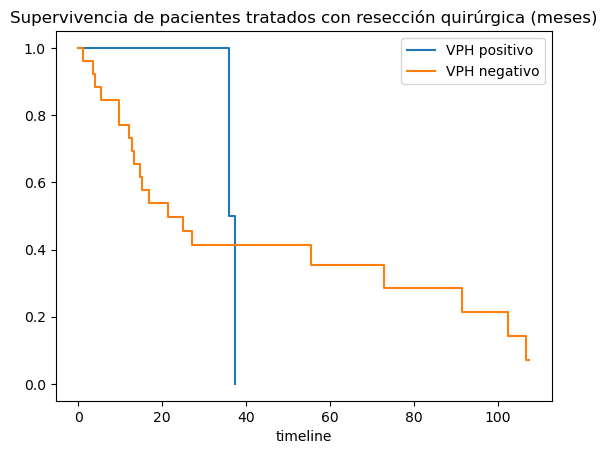

In [918]:
ax=plt.subplot(111)
vph_kmf=kmf.fit(durations=df6[cx_vph]['Supervivencia desde el dx (meses)'], event_observed=df6[cx_vph]['Estado actual'], label='VPH positivo')
vph_kmf.plot_survival_function(ax=ax, ci_show=False)
print('vph:',vph_kmf.median_survival_time_)
novph_kmf=kmf.fit(durations=df6[~cx_vph]['Supervivencia desde el dx (meses)'], event_observed=df6[~cx_vph]['Estado actual'], label='VPH negativo')
novph_kmf.plot_survival_function(ax=ax, ci_show=False)
print('no vph:', novph_kmf.median_survival_time_)
plt.title('Supervivencia de pacientes tratados con resección quirúrgica (meses)')
plt.show()

In [919]:
sup_vph= df6[df6['VPH']=='Positivo']['Supervivencia desde el dx (meses)']
sup_no_vph=df6[df6['VPH']=='Negativo']['Supervivencia desde el dx (meses)']
event_vph= df6[df6['VPH']=='Positivo']['Estado actual']
event_no_vph= df6[df6['VPH']=='Negativo']['Estado actual']

In [920]:
resultados=logrank_test(sup_vph, sup_no_vph, event_vph, event_no_vph, alpha=0.95)
resultados.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.03 0.86      0.22

In [921]:
T_exp, E_exp = sup_vph, event_vph
T_con, E_con = sup_no_vph, event_no_vph

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time =[12,36]
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = [12, 36]
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 2 total observations, 0 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 26 total observations, 6 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
            NaN  NaN       NaN
           0.05 0.82      0.29

In [922]:
vphpos_kmf=kmf.fit(durations=df6[cx_vph]['Supervivencia desde el dx (meses)'], 
                   event_observed=df6[cx_vph]['Estado actual'], label='VPH positivo')
vphpos_kmf.predict([12,36,60])

12    1.0
36    0.5
60    0.0
Name: VPH positivo, dtype: float64

In [923]:
novph_kmf=kmf.fit(durations=df6[~cx_vph]['Supervivencia desde el dx (meses)'], 
                   event_observed=df6[~cx_vph]['Estado actual'], label='VPH negativo')
novph_kmf.predict([12,36,60])

12    0.730769
36    0.414201
60    0.355030
Name: VPH negativo, dtype: float64

In [924]:
df7=pd.DataFrame(df[['Quimioterapia','Radioterapia', 'Supervivencia desde el dx (meses)', 'Estado actual','VPH']].dropna())
print(df7)

   Quimioterapia Radioterapia  Supervivencia desde el dx (meses)  \
0             No           Sí                          25.300000   
1             Sí           No                           9.666667   
3             No           No                          14.633333   
4             No           No                           2.800000   
5             No           No                           1.033333   
7             No           No                           5.400000   
8             No           Sí                          36.000000   
9             No           No                          48.700000   
11            No           Sí                           3.966667   
12            Sí           Sí                          12.866667   
13            No           Sí                          91.433333   
15            Sí           Sí                           9.633333   
18            Sí           Sí                          16.833333   
19            No           No                   

In [925]:
qt=df7[df7['Quimioterapia']=='Sí']
df8=pd.DataFrame(qt.dropna())
print(df8)

   Quimioterapia Radioterapia  Supervivencia desde el dx (meses)  \
1             Sí           No                           9.666667   
12            Sí           Sí                          12.866667   
15            Sí           Sí                           9.633333   
18            Sí           Sí                          16.833333   
21            Sí           Sí                          13.166667   
22            Sí           Sí                         106.766667   
23            Sí           Sí                         107.533333   
24            Sí           Sí                          24.866667   
26            Sí           Sí                          37.300000   
30            Sí           Sí                          27.233333   
31            Sí           No                          64.000000   
34            Sí           No                          55.566667   
37            Sí           No                          43.133333   
38            Sí           Sí                   

In [926]:
rt=df7[df7['Radioterapia']=='Sí']
df9=pd.DataFrame(rt.dropna())
print(df9)

   Quimioterapia Radioterapia  Supervivencia desde el dx (meses)  \
0             No           Sí                          25.300000   
8             No           Sí                          36.000000   
11            No           Sí                           3.966667   
12            Sí           Sí                          12.866667   
13            No           Sí                          91.433333   
15            Sí           Sí                           9.633333   
18            Sí           Sí                          16.833333   
21            Sí           Sí                          13.166667   
22            Sí           Sí                         106.766667   
23            Sí           Sí                         107.533333   
24            Sí           Sí                          24.866667   
26            Sí           Sí                          37.300000   
29            No           Sí                          12.000000   
30            Sí           Sí                   

vph: 21.56666667
no vph: 24.86666667


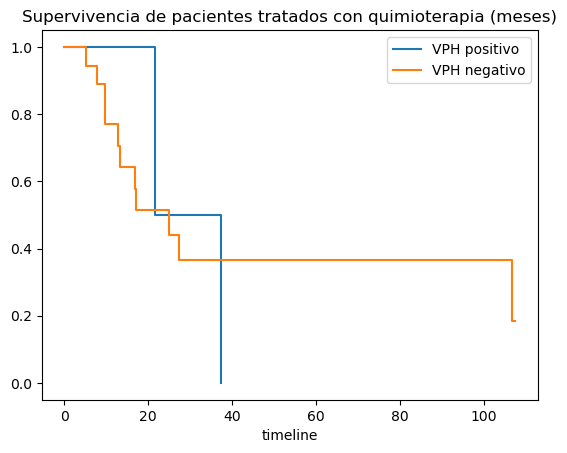

In [927]:
qt_vph= df8['VPH']== 'Positivo'
ax=plt.subplot(111)
qt_vph_kmf=kmf.fit(durations=df8[qt_vph]['Supervivencia desde el dx (meses)'], event_observed=df8[qt_vph]['Estado actual'], label='VPH positivo')
qt_vph_kmf.plot_survival_function(ax=ax, ci_show=False)
print('vph:',vph_kmf.median_survival_time_)
qt_novph_kmf=kmf.fit(durations=df8[~qt_vph]['Supervivencia desde el dx (meses)'], event_observed=df8[~qt_vph]['Estado actual'], label='VPH negativo')
qt_novph_kmf.plot_survival_function(ax=ax, ci_show=False)
print('no vph:', novph_kmf.median_survival_time_)
plt.title('Supervivencia de pacientes tratados con quimioterapia (meses)')
plt.show()

vph: 36.0
no vph: 24.86666667


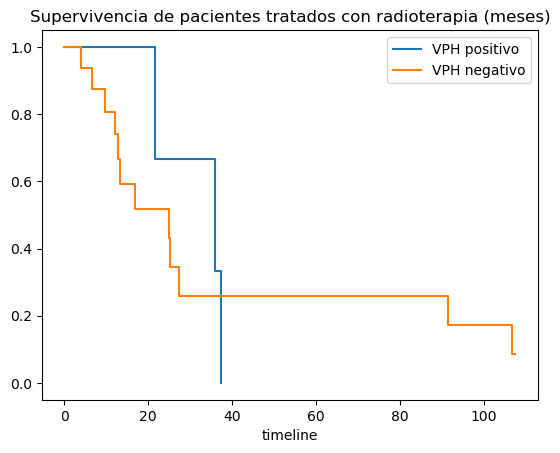

In [928]:
rt_vph= df9['VPH']== 'Positivo'
ax=plt.subplot(111)
vph_kmf=kmf.fit(durations=df9[rt_vph]['Supervivencia desde el dx (meses)'], event_observed=df9[rt_vph]['Estado actual'], label='VPH positivo')
vph_kmf.plot_survival_function(ax=ax, ci_show=False)
print('vph:',vph_kmf.median_survival_time_)
novph_kmf=kmf.fit(durations=df9[~rt_vph]['Supervivencia desde el dx (meses)'], event_observed=df9[~rt_vph]['Estado actual'], label='VPH negativo')
novph_kmf.plot_survival_function(ax=ax, ci_show=False)
print('no vph:', novph_kmf.median_survival_time_)
plt.title('Supervivencia de pacientes tratados con radioterapia (meses)')
plt.show()

In [929]:
sup_vph= df8[df8['VPH']=='Positivo']['Supervivencia desde el dx (meses)']
sup_no_vph=df8[df8['VPH']=='Negativo']['Supervivencia desde el dx (meses)']
event_vph= df8[df8['VPH']=='Positivo']['Estado actual']
event_no_vph= df8[df8['VPH']=='Negativo']['Estado actual']
resultados=logrank_test(sup_vph, sup_no_vph, event_vph, event_no_vph, alpha=0.95)
resultados.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.04 0.84      0.26

In [930]:
T_exp, E_exp = sup_vph, event_vph
T_con, E_con = sup_no_vph, event_no_vph

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time =[12,36,60]
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = [12, 36, 60]
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 2 total observations, 0 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 18 total observations, 7 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic      p  -log2(p)
            NaN    NaN       NaN
           0.12   0.73      0.45
            inf <0.005       inf

In [931]:
vphpos_kmf=kmf.fit(durations=df8[qt_vph]['Supervivencia desde el dx (meses)'], 
                   event_observed=df8[qt_vph]['Estado actual'], label='VPH positivo')
print(vphpos_kmf.predict([12,36,60]))
novph_kmf=kmf.fit(durations=df8[~qt_vph]['Supervivencia desde el dx (meses)'], 
                   event_observed=df8[~qt_vph]['Estado actual'], label='VPH positivo')
print(novph_kmf.predict([12,36,60]))

12    1.0
36    0.5
60    0.0
Name: VPH positivo, dtype: float64
12    0.770370
36    0.366843
60    0.366843
Name: VPH positivo, dtype: float64


In [932]:
sup_vph= df9[df9['VPH']=='Positivo']['Supervivencia desde el dx (meses)']
sup_no_vph=df9[df9['VPH']=='Negativo']['Supervivencia desde el dx (meses)']
event_vph= df9[df9['VPH']=='Positivo']['Estado actual']
event_no_vph= df9[df9['VPH']=='Negativo']['Estado actual']
resultados=logrank_test(sup_vph, sup_no_vph, event_vph, event_no_vph, alpha=0.95)
resultados.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.08 0.77      0.37

In [933]:
vphpos_kmf=kmf.fit(durations=df9[rt_vph]['Supervivencia desde el dx (meses)'], 
                   event_observed=df9[rt_vph]['Estado actual'], label='VPH positivo')
print(vphpos_kmf.predict([12,36,60]))
novph_kmf=kmf.fit(durations=df9[~rt_vph]['Supervivencia desde el dx (meses)'], 
                   event_observed=df9[~rt_vph]['Estado actual'], label='VPH positivo')
print(novph_kmf.predict([12,36,60]))

12    1.000000
36    0.333333
60    0.000000
Name: VPH positivo, dtype: float64
12    0.740385
36    0.259135
60    0.259135
Name: VPH positivo, dtype: float64


In [934]:
T_exp, E_exp = sup_vph, event_vph
T_con, E_con = sup_no_vph, event_no_vph

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time =[12, 36]
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = [12, 36]
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 4 total observations, 1 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 16 total observations, 4 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
            NaN  NaN       NaN
           0.06 0.80      0.31

In [935]:
tabla=[[3,3], [19, 23]]
odd_ratio, p_value = stats.fisher_exact(tabla, alternative='less')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))
#N0

odd ratio is : 1.2105263157894737
p_value is : 0.7443940078451621


In [936]:
tabla=[[1,5], [13, 29]]
odd_ratio, p_value = stats.fisher_exact(tabla, alternative='less')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))
#recurrencia

odd ratio is : 0.4461538461538462
p_value is : 0.42704501287208946


In [937]:
tabla=[[6,1], [13,29]]
odd_ratio, p_value = stats.fisher_exact(tabla, alternative='greater')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))
#recurrencia

odd ratio is : 13.384615384615385
p_value is : 0.010062190031210966


In [938]:
df10=pd.DataFrame(df[['VPH', 'DFS', 'Recurrencia locorregional']].dropna())
vphpos= df10['VPH']== 'Positivo'
vphneg= df10['VPH']=='Negativo'
print(df10 )

         VPH     DFS  Recurrencia locorregional
0   Negativo   25.30                        0.0
1   Negativo    9.13                        1.0
3   Negativo   14.63                        0.0
4   Negativo    2.80                        0.0
5   Negativo    1.03                        0.0
6   Negativo    0.00                        1.0
7   Negativo    5.40                        0.0
8   Positivo   27.43                        1.0
9   Negativo   48.70                        0.0
10  Negativo   19.63                        0.0
11  Negativo    3.97                        0.0
12  Negativo    9.13                        1.0
13  Negativo    0.30                        1.0
14  Negativo    7.70                        0.0
15  Negativo    9.63                        0.0
16  Negativo    7.80                        1.0
17  Negativo   15.97                        1.0
18  Negativo   16.83                        0.0
19  Negativo   72.80                        0.0
20  Negativo   21.40                    

vph: 27.43
no vph: inf


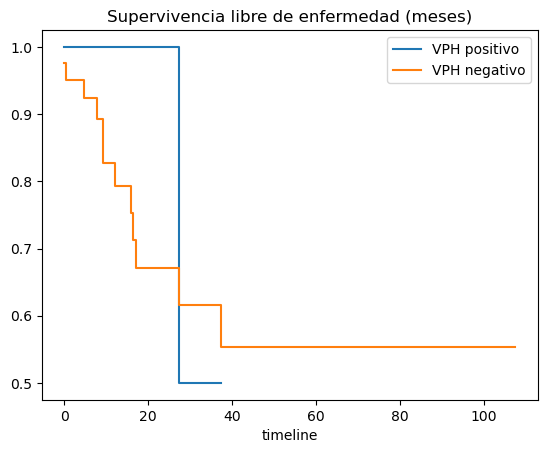

In [939]:
ax=plt.subplot(111)
vph_kmf=kmf.fit(durations=df10[vphpos]['DFS'], event_observed=df10[vphpos]['Recurrencia locorregional'], label='VPH positivo')
vph_kmf.plot_survival_function(ax=ax, ci_show=False)
print('vph:',vph_kmf.median_survival_time_)
novph_kmf=kmf.fit(durations=df10[vphneg]['DFS'], event_observed=df10[vphneg]['Recurrencia locorregional'], label='VPH negativo')
novph_kmf.plot_survival_function(ax=ax, ci_show=False)
print('no vph:', novph_kmf.median_survival_time_)
plt.title('Supervivencia libre de enfermedad (meses)')
plt.show()

In [940]:
dfs_vph= df6[df6['VPH']=='Positivo']['DFS']
dfs_no_vph=df6[df6['VPH']=='Negativo']['DFS']
event_vph= df6[df6['VPH']=='Positivo']['Recurrencia locorregional']
event_no_vph= df6[df6['VPH']=='Negativo']['Recurrencia locorregional']

KeyError: 'DFS'

In [941]:
from lifelines.statistics import logrank_test
resultados=logrank_test(dfs_vph, dfs_no_vph, event_vph, event_no_vph, alpha=0.95)
resultados.print_summary()

AssertionError: inputs must be of the same length.

In [942]:
from lifelines.statistics import survival_difference_at_fixed_point_in_time_test
T_exp, E_exp = dfs_vph, event_vph
T_con, E_con = dfs_no_vph, event_no_vph

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time =12
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

ValueError: cannot reshape array of size 4 into shape (6,)

In [943]:
novph_kmf=kmf.fit(durations=df6[vphneg]['DFS'], 
                  event_observed=df6[vphneg]['Recurrencia locorregional'], label='VPH negativo')
print('no vph:', novph_kmf.median_survival_time_)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_30276\1593932212.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  novph_kmf=kmf.fit(durations=df6[vphneg]['DFS'],


KeyError: 'DFS'

In [944]:
np.median(df6[vphneg]['DFS'])

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_30276\1118970451.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.median(df6[vphneg]['DFS'])


KeyError: 'DFS'

In [945]:
np.median(df6[vphpos]['DFS'])

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_30276\2650885269.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.median(df6[vphpos]['DFS'])


KeyError: 'DFS'

In [946]:
tabla=[[3,36], [2,6]]
odd_ratio, p_value = stats.fisher_exact(tabla, alternative='less')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))
#recurrencia

odd ratio is : 0.25
p_value is : 0.19568835527357997


In [947]:
fig, axs = plt.subplots(3) 

In [948]:
cx_vph_kmf=kmf.fit(durations=df6[cx_vph]['Supervivencia desde el dx (meses)'], event_observed=df6[cx_vph]['Estado actual'], label='HPV positive')
cx_vph_kmf.plot_survival_function(ax=axs[0], ci_show=False)
cx_novph_kmf=kmf.fit(durations=df6[~cx_vph]['Supervivencia desde el dx (meses)'], event_observed=df6[~cx_vph]['Estado actual'], label='HPV negative')
cx_novph_kmf.plot_survival_function(ax=axs[0], ci_show=False)
axs[0].set_title('Surgery')
axs[0].set_xlabel('Months')
axs[0].set_ylabel('Cumm')

Text(0, 0.5, 'Cumm')

In [949]:
qt_vph_kmf=kmf.fit(durations=df8[qt_vph]['Supervivencia desde el dx (meses)'], event_observed=df8[qt_vph]['Estado actual'], label='HPV positive')
qt_vph_kmf.plot_survival_function(ax=axs[1], ci_show=False)
qt_novph_kmf=kmf.fit(durations=df8[~qt_vph]['Supervivencia desde el dx (meses)'], event_observed=df8[~qt_vph]['Estado actual'], label='HPV negative')
qt_novph_kmf.plot_survival_function(ax=axs[1], ci_show=False)
axs[1].set_title('Chemotherapy')
axs[1].set_xlabel('Months')
axs[1].set_ylabel('Cumm')

Text(0, 0.5, 'Cumm')

In [950]:
rt_vph_kmf=kmf.fit(durations=df9[rt_vph]['Supervivencia desde el dx (meses)'], event_observed=df9[rt_vph]['Estado actual'], label='HPV positive')
rt_vph_kmf.plot_survival_function(ax=axs[2], ci_show=False)
rt_novph_kmf=kmf.fit(durations=df9[~rt_vph]['Supervivencia desde el dx (meses)'], event_observed=df9[~rt_vph]['Estado actual'], label='HPV negative')
rt_novph_kmf.plot_survival_function(ax=axs[2], ci_show=False)
axs[2].set_title('Radiotherapy')
axs[2].set_xlabel('Months')
axs[2].set_ylabel('Cumm')

Text(0, 0.5, 'Cumm')

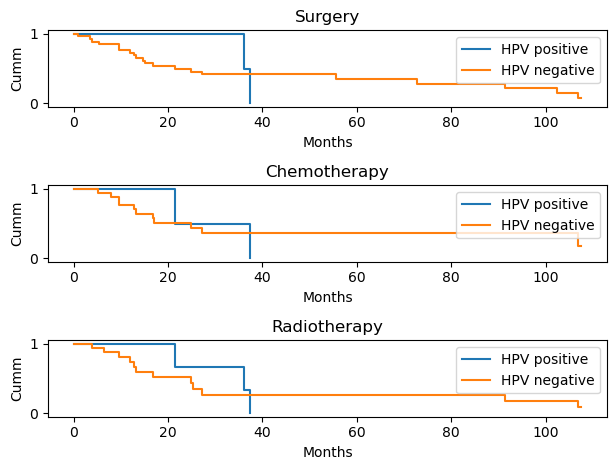

In [951]:
plt.tight_layout()
plt.show()

In [952]:
fig, axs = plt.subplots(3) 

In [953]:
cx_vph_kmf=kmf.fit(durations=df6[cx_vph]['Supervivencia desde el dx (meses)'], event_observed=df6[cx_vph]['Estado actual'])
cx_vph_kmf.plot_survival_function(ax=axs[0], ci_show=False)
cx_novph_kmf=kmf.fit(durations=df6[~cx_vph]['Supervivencia desde el dx (meses)'], event_observed=df6[~cx_vph]['Estado actual'])
cx_novph_kmf.plot_survival_function(ax=axs[0], ci_show=False)
axs[0].set_title('Surgery')
axs[0].set_xlabel('')
axs[0].set_ylabel('Cumm')

Text(0, 0.5, 'Cumm')

In [954]:
qt_vph_kmf=kmf.fit(durations=df8[qt_vph]['Supervivencia desde el dx (meses)'], event_observed=df8[qt_vph]['Estado actual'])
qt_vph_kmf.plot_survival_function(ax=axs[1], ci_show=False)
qt_novph_kmf=kmf.fit(durations=df8[~qt_vph]['Supervivencia desde el dx (meses)'], event_observed=df8[~qt_vph]['Estado actual'])
qt_novph_kmf.plot_survival_function(ax=axs[1], ci_show=False)
axs[1].set_title('Chemotherapy')
axs[1].set_xlabel('')
axs[1].set_ylabel('Cumm')

Text(0, 0.5, 'Cumm')

In [955]:
rt_vph_kmf=kmf.fit(durations=df9[rt_vph]['Supervivencia desde el dx (meses)'], event_observed=df9[rt_vph]['Estado actual'])
rt_vph_kmf.plot_survival_function(ax=axs[2], ci_show=False)
rt_novph_kmf=kmf.fit(durations=df9[~rt_vph]['Supervivencia desde el dx (meses)'], event_observed=df9[~rt_vph]['Estado actual'])
rt_novph_kmf.plot_survival_function(ax=axs[2], ci_show=False)
axs[2].set_title('Radiotherapy')
axs[2].set_xlabel('Months')
axs[2].set_ylabel('Cumm')
axs[2].legend('VPH')

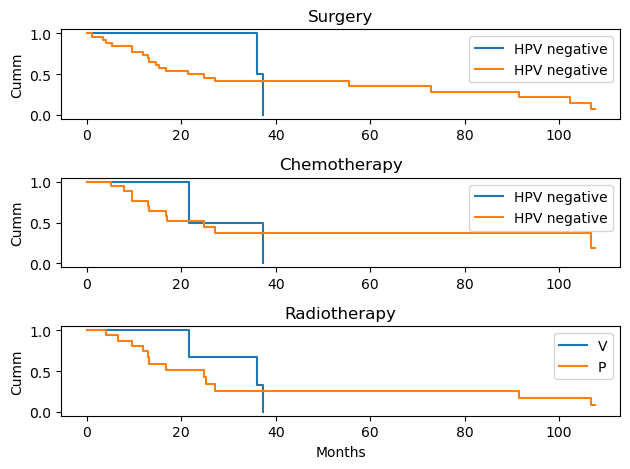

In [956]:
plt.tight_layout()
plt.show()

In [957]:
import statsmodels.api as smf

In [958]:
df50= pd.get_dummies(df)

In [1137]:
df50.columns
df['relapse']=df['Recurrencia locorregional']


In [1156]:
df68=pd.DataFrame(df[['Edad', 'relapse','Consumo de tabaco', 'Consumo de alcohol',
                       'Sexo', 'Obesidad ', 'Diabetes ', 'ERGE', 'Localización del tumor', 
                        'M', 'T', 'Estadio clínico', 'Diferenciación ', 'VPH']].dropna())
df68.shape

(47, 14)

In [1157]:
dummies= pd.get_dummies(df68)
dummies.columns

Index(['Edad', 'relapse', 'Consumo de tabaco_No', 'Consumo de tabaco_Sí',
       'Consumo de alcohol_No', 'Consumo de alcohol_Sí', 'Sexo_Femenino',
       'Sexo_Masculino', 'Obesidad _No', 'Obesidad _Sí', 'Diabetes _No',
       'Diabetes _Sí', 'ERGE_No', 'ERGE_Sí', 'Localización del tumor_Glótico',
       'Localización del tumor_Subglótico',
       'Localización del tumor_Supraglótico',
       'Localización del tumor_Transglótico', 'M_M0', 'M_M1', 'T_T1', 'T_T2',
       'T_T3', 'T_T4', 'Estadio clínico_I', 'Estadio clínico_II',
       'Estadio clínico_III', 'Estadio clínico_IV',
       'Diferenciación _Bien diferenciado',
       'Diferenciación _Mal diferenciado ',
       'Diferenciación _Moderadamente diferenciado', 'VPH_Negativo',
       'VPH_Positivo'],
      dtype='object')

In [1158]:
dummies= dummies[['Consumo de tabaco_Sí', 'Consumo de alcohol_Sí', 'Sexo_Femenino',
        'Obesidad _Sí', 'Diabetes _Sí', 'ERGE_Sí', 'Localización del tumor_Subglótico',
       'Localización del tumor_Supraglótico',
       'Localización del tumor_Transglótico', 'M_M1', 'T_T2',
       'T_T3', 'T_T4',
       'Estadio clínico_II', 'Estadio clínico_III', 'Estadio clínico_IV',
       'Diferenciación _Mal diferenciado ', 'Diferenciación _Moderadamente diferenciado',
       'VPH_Positivo']]

In [1159]:
data= pd.concat([df68, dummies], axis=1)
data= data.drop(['Consumo de tabaco', 'Consumo de alcohol',
                       'Sexo', 'Obesidad ', 'Diabetes ', 'ERGE', 'Localización del tumor', 
                        'M', 'T', 'Estadio clínico', 'Diferenciación ', 'VPH'], axis=1)
data.columns               

Index(['Edad', 'relapse', 'Consumo de tabaco_Sí', 'Consumo de alcohol_Sí',
       'Sexo_Femenino', 'Obesidad _Sí', 'Diabetes _Sí', 'ERGE_Sí',
       'Localización del tumor_Subglótico',
       'Localización del tumor_Supraglótico',
       'Localización del tumor_Transglótico', 'M_M1', 'T_T2', 'T_T3', 'T_T4',
       'Estadio clínico_II', 'Estadio clínico_III', 'Estadio clínico_IV',
       'Diferenciación _Mal diferenciado ',
       'Diferenciación _Moderadamente diferenciado', 'VPH_Positivo'],
      dtype='object')

In [1199]:
x=data['M_M1']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.2532
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.617
Time:                        04:01:28   Log-Likelihood:                -11.258
No. Observations:                  47   AIC:                             26.52
Df Residuals:                      45   BIC:                             30.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0976      0.049      1.988      0.0

In [1161]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.128864,0.031804,1.011096,1.260350
relapse,0.951435,0.621821,0.777512,1.164264


In [1162]:
x=data['Obesidad _Sí']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9269
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.341
Time:                        03:39:16   Log-Likelihood:                -10.911
No. Observations:                  47   AIC:                             25.82
Df Residuals:                      45   BIC:                             29.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0930      0.048      1.956   

In [1163]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.097487,0.056728,0.997225,1.207830
Obesidad _Sí,1.169968,0.340807,0.842471,1.624775


In [1164]:
x=data['Consumo de tabaco_Sí']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.08639
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.770
Time:                        03:39:32   Log-Likelihood:                -11.345
No. Observations:                  47   AIC:                             26.69
Df Residuals:                      45   BIC:                             30.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0833 

In [1165]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.086904,0.364029,0.905109,1.305213
Consumo de tabaco_Sí,1.031436,0.770169,0.834311,1.275138


In [1166]:
x=data['Consumo de alcohol_Sí']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                  0.006569
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.936
Time:                        03:39:43   Log-Likelihood:                -11.387
No. Observations:                  47   AIC:                             26.77
Df Residuals:                      45   BIC:                             30.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

In [1167]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.117519,0.141599,0.962263,1.297824
Consumo de alcohol_Sí,0.992366,0.935762,0.820300,1.200526


In [1168]:
x=data['Sexo_Femenino']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.2394
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.627
Time:                        03:39:49   Log-Likelihood:                -11.266
No. Observations:                  47   AIC:                             26.53
Df Residuals:                      45   BIC:                             30.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1111      0.047      2.372

In [1169]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.117519,0.022045,1.016894,1.228101
Sexo_Femenino,0.894839,0.627044,0.566359,1.413834


In [1197]:
x=data['Edad']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.525
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.223
Time:                        03:51:29   Log-Likelihood:                -10.607
No. Observations:                  47   AIC:                             25.21
Df Residuals:                      45   BIC:                             28.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4176      0.256      1.631      0.1

In [1198]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.518297,0.109850,0.906597,2.542723
Edad,0.995049,0.223252,0.987027,1.003136


In [1171]:
x=data['ERGE_Sí']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     3.514
Date:                Mon, 31 Jul 2023   Prob (F-statistic):             0.0673
Time:                        03:40:12   Log-Likelihood:                -9.6232
No. Observations:                  47   AIC:                             23.25
Df Residuals:                      45   BIC:                             26.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0889      0.045      1.965      0.0

In [1172]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.092959,0.055625,0.997774,1.197225
ERGE_Sí,1.508493,0.067350,0.969865,2.346254


In [1173]:
x=data['Localización del tumor_Supraglótico']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.1105
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.741
Time:                        03:40:31   Log-Likelihood:                -11.333
No. Observations:                  47   AIC:                             26.67
Df Residuals:                      45   BIC:                             30.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [1174]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.105171,0.050494,0.999776,1.221677
Localización del tumor_Supraglótico,1.043789,0.741148,0.805056,1.353316


In [1175]:
x=data['Localización del tumor_Subglótico']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.3682
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.547
Time:                        03:40:42   Log-Likelihood:                -11.199
No. Observations:                  47   AIC:                             26.40
Df Residuals:                      45   BIC:                             30.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [1176]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.120345,0.020499,1.018517,1.232352
Localización del tumor_Subglótico,0.892582,0.547010,0.612137,1.301511


In [1177]:
x=data['Localización del tumor_Transglótico']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.357
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.250
Time:                        03:40:47   Log-Likelihood:                -10.692
No. Observations:                  47   AIC:                             25.38
Df Residuals:                      45   BIC:                             29.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [1178]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.192999,0.023572,1.025125,1.388364
Localización del tumor_Transglótico,0.896010,0.250129,0.741095,1.083307


In [1179]:
x=data['T_T2']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.3682
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.547
Time:                        03:40:55   Log-Likelihood:                -11.199
No. Observations:                  47   AIC:                             26.40
Df Residuals:                      45   BIC:                             30.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1136      0.047      2.402      0.0

In [1180]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.120345,0.020499,1.018517,1.232352
T_T2,0.892582,0.547010,0.612137,1.301511


In [1181]:
x=data['T_T3']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.08639
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.770
Time:                        03:40:59   Log-Likelihood:                -11.345
No. Observations:                  47   AIC:                             26.69
Df Residuals:                      45   BIC:                             30.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1143      0.053      2.148      0.0

In [1182]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.121072,0.037153,1.007138,1.247896
T_T3,0.969522,0.770169,0.784229,1.198594


In [1183]:
x=data['T_T4']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6771
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.415
Time:                        03:41:06   Log-Likelihood:                -11.039
No. Observations:                  47   AIC:                             26.08
Df Residuals:                      45   BIC:                             29.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1500      0.070      2.145      0.0

In [1184]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.161834,0.037400,1.009185,1.337573
T_T4,0.926885,0.414926,0.769689,1.116185


In [1185]:
x=data['Estadio clínico_II']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.2394
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.627
Time:                        03:41:19   Log-Likelihood:                -11.266
No. Observations:                  47   AIC:                             26.53
Df Residuals:                      45   BIC:                             30.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1111      0

In [1186]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.117519,0.022045,1.016894,1.228101
Estadio clínico_II,0.894839,0.627044,0.566359,1.413834


In [1187]:
x=data['Estadio clínico_III']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.496
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.228
Time:                        03:41:24   Log-Likelihood:                -10.622
No. Observations:                  47   AIC:                             25.24
Df Residuals:                      45   BIC:                             28.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1351    

In [1188]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.144691,0.011021,1.033025,1.268429
Estadio clínico_III,0.873598,0.227653,0.699309,1.091324


In [1189]:
x=data['Estadio clínico_IV']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.08484
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.772
Time:                        03:41:34   Log-Likelihood:                -11.346
No. Observations:                  47   AIC:                             26.69
Df Residuals:                      45   BIC:                             30.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1250      0

In [1190]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.133148,0.119227,0.967042,1.327787
Estadio clínico_IV,0.972169,0.772185,0.799790,1.181700


In [1191]:
x=data['Diferenciación _Moderadamente diferenciado']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                  0.006569
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.936
Time:                        03:41:42   Log-Likelihood:                -11.387
No. Observations:                  47   AIC:                             26.77
Df Residuals:                      45   BIC:                             30.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [1192]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.108988,0.083828,0.985708,1.247687
Diferenciación _Moderadamente diferenciado,1.007692,0.935762,0.832968,1.219066


In [1193]:
x=data['Diferenciación _Mal diferenciado ']
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     3.514
Date:                Mon, 31 Jul 2023   Prob (F-statistic):             0.0673
Time:                        03:41:51   Log-Likelihood:                -9.6232
No. Observations:                  47   AIC:                             23.25
Df Residuals:                      45   BIC:                             26.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [1194]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.092959,0.055625,0.997774,1.197225
Diferenciación _Mal diferenciado,1.508493,0.067350,0.969865,2.346254


In [1195]:
x=data[['Diferenciación _Mal diferenciado ', 'ERGE_Sí']]
y= data['VPH_Positivo']
x= smf.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     3.931
Date:                Mon, 31 Jul 2023   Prob (F-statistic):             0.0269
Time:                        03:42:02   Log-Likelihood:                -7.5266
No. Observations:                  47   AIC:                             21.05
Df Residuals:                      44   BIC:                             26.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [1196]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
const,1.072259,0.126239,0.979765,1.173484
Diferenciación _Mal diferenciado,1.537615,0.048818,1.002333,2.358757
ERGE_Sí,1.537615,0.048818,1.002333,2.358757


In [ ]:
df70=pd.DataFrame(df[['Localización del tumor', 
                     'T', 'Diferenciación ', 'VPH']].dropna())
df70=pd.get_dummies(df70,drop_first=True)
df70.columns

In [1147]:
x2=df70[['Localización del tumor_Subglótico',
       'Localización del tumor_Supraglótico',
       'Localización del tumor_Transglótico', 'T_T2', 'T_T3', 'T_T4',
       'Diferenciación _Mal diferenciado ',
       'Diferenciación _Moderadamente diferenciado']]
y2= df70['VPH_Positivo']
x2= smf.add_constant(x2)

model = smf.OLS(y2, x2).fit()
predictions = model.predict(x2) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     1.511
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.186
Time:                        03:30:50   Log-Likelihood:                -4.9008
No. Observations:                  47   AIC:                             27.80
Df Residuals:                      38   BIC:                             44.45
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

In [1027]:
df71=pd.DataFrame(df[['Sexo', 'Localización del tumor', 
                        'M', 'T', 'N', 'Estadio clínico', 'Diferenciación ', 'VPH']].dropna())

In [1028]:
df71= pd.get_dummies(df71, drop_first=True)
df71

,Sexo_Masculino,Localización del tumor_Subglótico,Localización del tumor_Supraglótico,Localización del tumor_Transglótico,M_M1,T_T2,T_T3,T_T4,N_N1,N_N2,N_N3,Estadio clínico_II,Estadio clínico_III,Estadio clínico_IV,Diferenciación _Mal diferenciado,Diferenciación _Moderadamente diferenciado,VPH_Positivo
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
2,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0
5,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
6,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
7,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
9,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [1029]:
df71.columns

Index(['Sexo_Masculino', 'Localización del tumor_Subglótico',
       'Localización del tumor_Supraglótico',
       'Localización del tumor_Transglótico', 'M_M1', 'T_T2', 'T_T3', 'T_T4',
       'N_N1', 'N_N2', 'N_N3', 'Estadio clínico_II', 'Estadio clínico_III',
       'Estadio clínico_IV', 'Diferenciación _Mal diferenciado ',
       'Diferenciación _Moderadamente diferenciado', 'VPH_Positivo'],
      dtype='object')

In [1030]:
x3=df71['Localización del tumor_Supraglótico']
y3= df71['VPH_Positivo']
x3= smf.add_constant(x3)

model = smf.OLS(y3, x3).fit()
predictions = model.predict(x3) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:           VPH_Positivo   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                   0.04329
Date:                Wed, 19 Jul 2023   Prob (F-statistic):              0.836
Time:                        09:25:40   Log-Likelihood:                -12.218
No. Observations:                  42   AIC:                             28.44
Df Residuals:                      40   BIC:                             31.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

In [ ]:
print(df['Edad'].std())

In [ ]:
print(df['Edad'].max())
print(df['Edad'].min())

In [ ]:
df.groupby('VPH')['Edad'].std()

In [ ]:
df.groupby('VPH')['Edad'].min()

In [ ]:
df.groupby('VPH')['Edad'].max()

SyntaxError: invalid syntax (255517071.py, line 1)